<div style="text-align:center; color:blue;"><h1>English Essay Score Predicting</h1></div>


### Project Summary:

The goal of this project is to develop an end-to-end pipeline capable of processing essays and providing an output grade that describes the level of English proficiency.

### Project Goal:
By carefully assessing different linguistic elements like grammar, vocabulary, and flow, these forecasts offer important information about people's writing abilities. Their goal is to have a dependable tool that can evaluate how well new students can write in English using the IELTS grading system. This tool would also assist potential students in understanding how much effort they need to put in to reach the next level.

### Introduction
Writing in English is a key part of language education. Nowadays, with the role played by technological advancement in the education, being able to predict someone's score in english is super important. With the help of advanced technologies and techniques, such as NLP and Machine learning, , we will be able to make this task (grading english essays) easier and faster. Our ambition is to have a reliable tool to assess new students’ ability to write in English according to the IELTS grading system.

First, we begin by importing the required libraries and dependencies essential for building our end-to-end pipeline for English essay scoring. These libraries include tools for natural language processing (NLP), data manipulation, machine learning, and evaluation.
#### Libraries and Dependencies Set-Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%run AES_Pipeline_Functions.py
from AES_Pipeline_Functions import *
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import nltk
import spacy
from nltk.corpus import stopwords
from math import sqrt
from nltk.tokenize import sent_tokenize
import math
from functools import reduce
from textblob import TextBlob
import language_tool_python
import textstat
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN,RandomOverSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SALEH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SALEH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SALEH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SALEH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SALEH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SALEH\AppData\Roaming\nltk_data...
[nltk

Now, we will import our dataste to begin the process:

In [2]:
# Specify the path to your Excel file
file_path = r"C:\Users\SALEH\Desktop\Jana\DSTI\ML_Python_Labs\Project\Project 2\asap-aes/training_set_rel3.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

<div style="color:blue;"><h4>| Data Exploration </h4></div>

A small check-up of our data-set's content:

In [3]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


Followed by a further dig in to explore its content:

In [4]:
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

Intuitively, we will verify if our data contains any Nan values in our variables of interest (scores) that can get in the way of our workflow later:

In [5]:
# Group the DataFrame by essay_set
grouped = df.groupby('essay_set')

# Iterate through each essay set
for essay_set, group_data in grouped:
    print("Essay Set:", essay_set)
    
    # Get the columns that do not contain NaN values
    non_nan_columns = group_data.columns[~group_data.isnull().any()]
    
    # Print the non-NaN columns for the current essay set
    print("Columns with non-NaN values:", non_nan_columns.tolist())
    
    print()  # Add a newline for better readability

Essay Set: 1
Columns with non-NaN values: ['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'domain1_score']

Essay Set: 2
Columns with non-NaN values: ['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2', 'domain2_score']

Essay Set: 3
Columns with non-NaN values: ['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'domain1_score']

Essay Set: 4
Columns with non-NaN values: ['essay_id', 'essay_set', 'essay']

Essay Set: 5
Columns with non-NaN values: ['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'domain1_score']

Essay Set: 6
Columns with non-NaN values: ['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'domain1_score']

Essay Set: 7
Columns with non-NaN values: ['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'domain1_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater2_trait1',

In [6]:
for essay_set, group_data in df.groupby('essay_set'):
    nan_columns = group_data.columns[group_data.isnull().any()]  # Columns with NaN values
    non_nan_columns = group_data.columns.difference(nan_columns)  # Columns without NaN values

    # Check if there are any columns containing both NaN and non-NaN values
    columns_with_both = nan_columns.intersection(non_nan_columns)

    if len(columns_with_both) > 0:
        print("Essay Set:", essay_set)
        print("Columns containing both NaN and non-NaN values:")
        print(columns_with_both)
        print()
    else:
        print("Essay Set:", essay_set)
        print("No columns contain both NaN and non-NaN values.")
        print()

Essay Set: 1
No columns contain both NaN and non-NaN values.

Essay Set: 2
No columns contain both NaN and non-NaN values.

Essay Set: 3
No columns contain both NaN and non-NaN values.

Essay Set: 4
No columns contain both NaN and non-NaN values.

Essay Set: 5
No columns contain both NaN and non-NaN values.

Essay Set: 6
No columns contain both NaN and non-NaN values.

Essay Set: 7
No columns contain both NaN and non-NaN values.

Essay Set: 8
No columns contain both NaN and non-NaN values.



After further inspection of the result, we noticed that for one of our essay_set categories (essay_set = 4) contains a single score of Nan for the commun score to predict (domain1_score). Due to the dataset's size, since we are dealing with a big enough dataset, we decided to remove it to ensure the integrity of our dataset.

In [7]:
# Filter the DataFrame to include only examples from essay_set 4
essay_set_4_data = df[df['essay_set'] == 4]

# Check if 'domain1_score' column contains NaN values for essay_set 4
nan_domain1_score = essay_set_4_data['domain1_score'].isnull().any()

if nan_domain1_score:
    print("The 'domain1_score' column in essay_set 4 contains NaN values.")
else:
    print("The 'domain1_score' column in essay_set 4 does not contain NaN values.")

The 'domain1_score' column in essay_set 4 contains NaN values.


In [8]:
# Filter the DataFrame to include only examples from essay_set 4
essay_set_4_data = df[df['essay_set'] == 4]

# Count the number of NaN values in the 'domain1_score' column for essay_set 4
nan_count = essay_set_4_data['domain1_score'].isnull().sum()

print("Number of NaN values in the 'domain1_score' column for essay_set 4:", nan_count)

Number of NaN values in the 'domain1_score' column for essay_set 4: 1


In [9]:
nan_domain1_score_data = df[(df['essay_set'] == 4) & df['domain1_score'].isnull()]

# Print the DataFrame containing the rows where 'domain1_score' is NaN for essay_set 4
print("Rows with NaN values in 'domain1_score' for essay_set 4:")
print(nan_domain1_score_data)

Rows with NaN values in 'domain1_score' for essay_set 4:
      essay_id  essay_set                                              essay  \
6973     10534          4  When they come back, Saeng vowed silently to h...   

      rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
6973             NaN             NaN             NaN            NaN   

      rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
6973             NaN             NaN            NaN  ...            NaN   

      rater2_trait4  rater2_trait5  rater2_trait6  rater3_trait1  \
6973            NaN            NaN            NaN            NaN   

      rater3_trait2  rater3_trait3  rater3_trait4  rater3_trait5  \
6973            NaN            NaN            NaN            NaN   

      rater3_trait6  
6973            NaN  

[1 rows x 28 columns]


In [10]:
# Count the number of rows where 'domain1_score' is NaN in the DataFrame
nan_count = df['domain1_score'].isnull().sum()

print("Number of rows with 'domain1_score' = NaN:", nan_count)

Number of rows with 'domain1_score' = NaN: 1


<font color='red'><h4>| Attention:</h4></font> Since in our dataset's composition, we have only one special essay_set category (essay_set =2) that demands additional consideration. In fact, for this category, we will have to o predict two scores and not only one. So, as we checked the validity of the common score to predict for all the essays (domain1_score), we are now checking for this second exception to predict (domain2_score)if there's any Nan value we should give attention to.

In [11]:
# Count the number of rows where 'domain2_score' is NaN in the DataFrame only for essays of the second set
has_nan = df.loc[df['essay_set'] == 2, 'domain2_score'].isnull().any()

if has_nan:
    print("There are NaN values in the 'domain2_score' column for essay_set == 2")
else:
    print("There are no NaN values in the 'domain2_score' column for essay_set == 2")

There are no NaN values in the 'domain2_score' column for essay_set == 2


In [12]:
df.dropna(subset=['domain1_score'], inplace=True)

In [13]:
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

To proceed with our exploratory phase of the dataset, we will take a look at the distribution of our scores with respect to each category for sure.

<font color='green'><h4>| Reminder:</h4></font> As explained above, we have to a predict a score for all essays no matter the set they belonged to, with exception the second set, we have a second score to take care of. This is why, in the following visuals, you will notice for every essa_set a single plot showing the distribution of the common score to predict, with exception the second category for which we have a second histogram illustrating the distribution of its scores.

Additionally, for each distribution, we computed some characteristics that we thought might be interesting: 
   - the mean: which is the average value of the score
   - the median: which represents the middle value for the scores
   - the mode: which is the value that appears most frequently

Essay Set 1:
Characteristics of domain1_score:
Mean Score: 8.528323051037576
Median Score: 8.0
Mode Score: 8.0


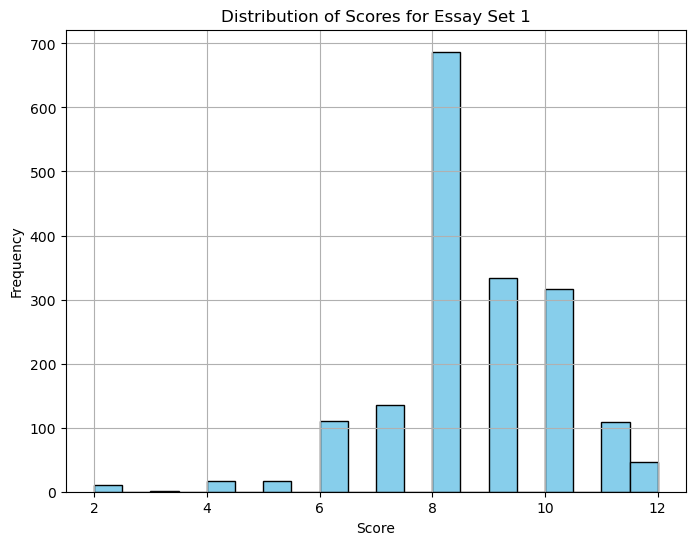

Essay Set 2:
Characteristics of domain1_score:
Mean Score: 3.4155555555555557
Median Score: 3.0
Mode Score: 4.0

Characteristics of domain2_score:
Mean Score: 3.3338888888888887
Median Score: 3.0
Mode Score: 4.0


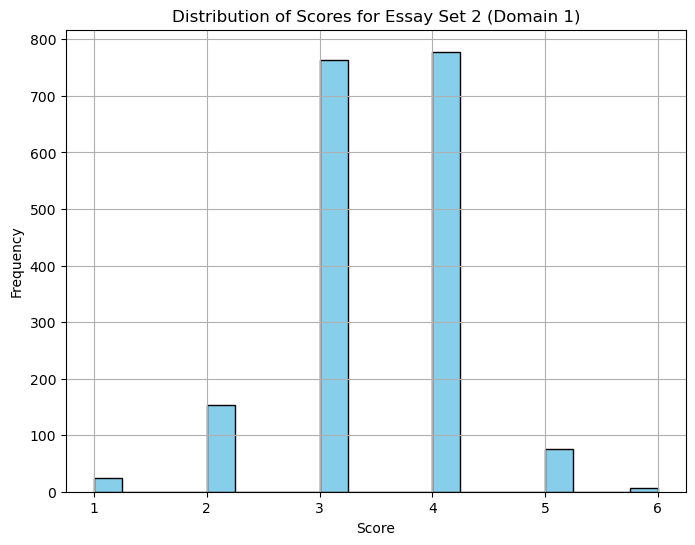

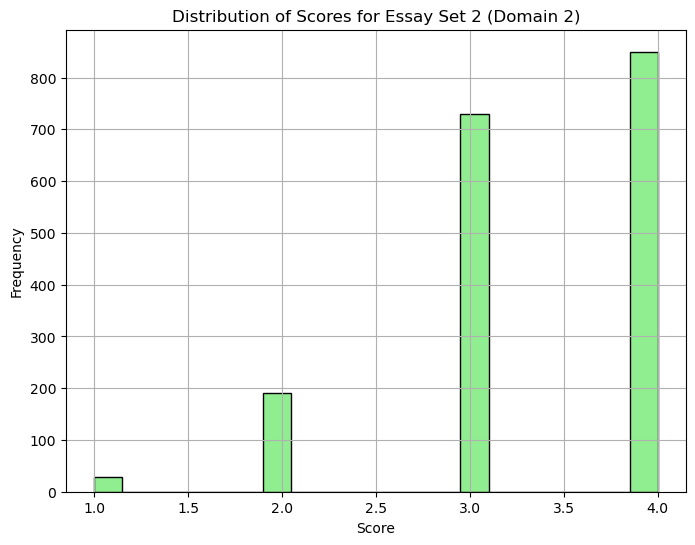

Essay Set 3:
Characteristics of domain1_score:
Mean Score: 1.8482039397450754
Median Score: 2.0
Mode Score: 2.0


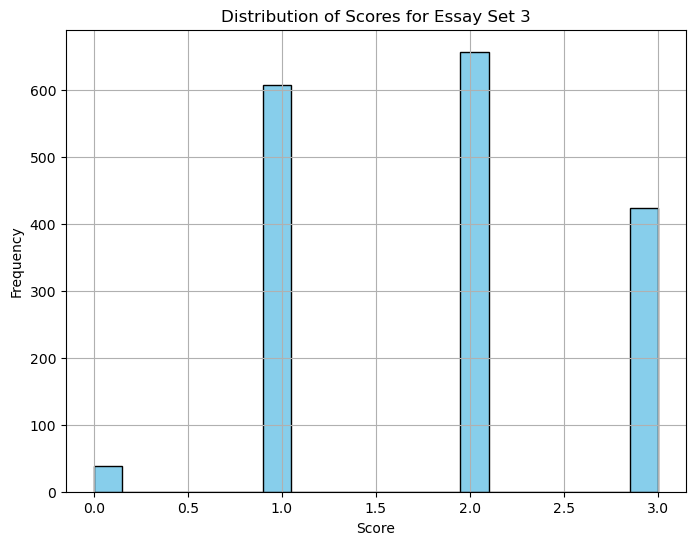

Essay Set 4:
Characteristics of domain1_score:
Mean Score: 1.4313946922642575
Median Score: 1.0
Mode Score: 1.0


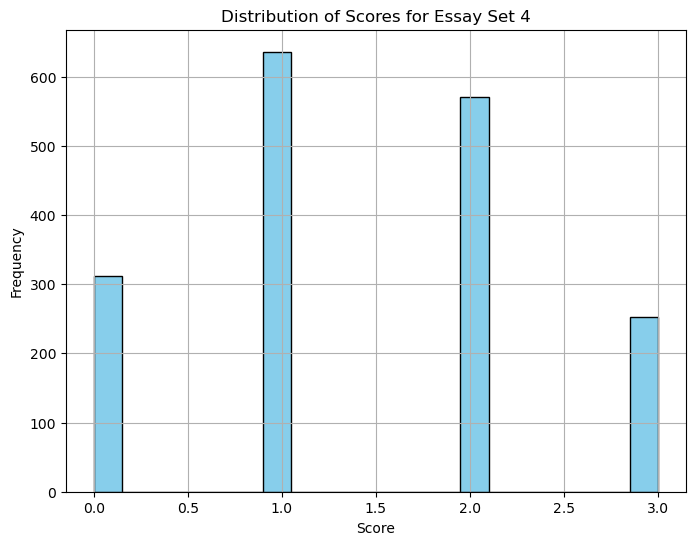

Essay Set 5:
Characteristics of domain1_score:
Mean Score: 2.4088642659279778
Median Score: 2.0
Mode Score: 2.0


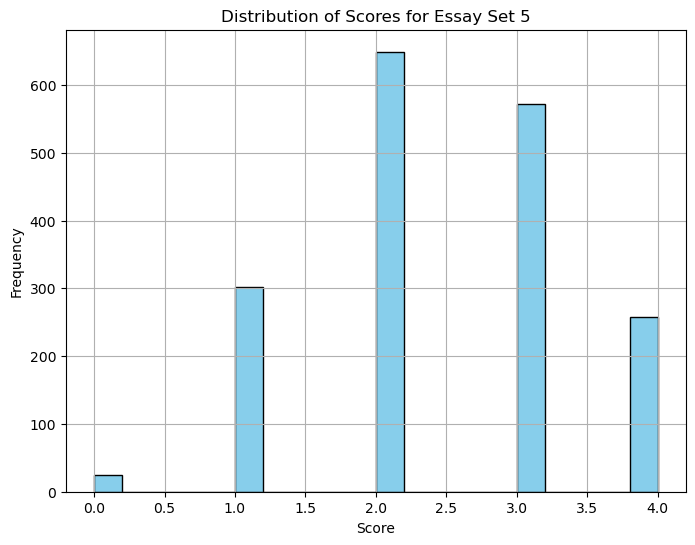

Essay Set 6:
Characteristics of domain1_score:
Mean Score: 2.72
Median Score: 3.0
Mode Score: 3.0


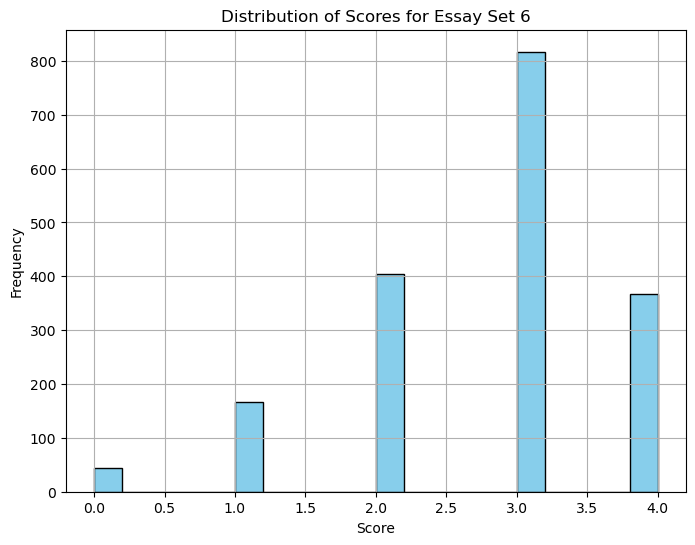

Essay Set 7:
Characteristics of domain1_score:
Mean Score: 16.062460165710643
Median Score: 16.0
Mode Score: 16.0


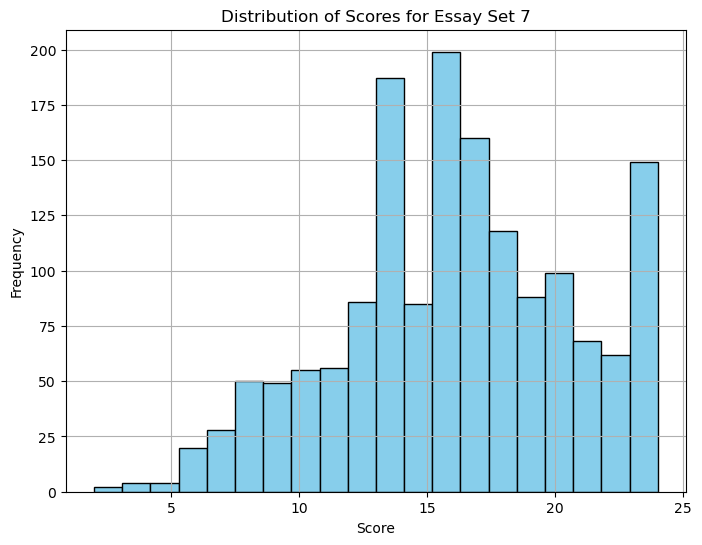

Essay Set 8:
Characteristics of domain1_score:
Mean Score: 36.95020746887967
Median Score: 37.0
Mode Score: 40.0


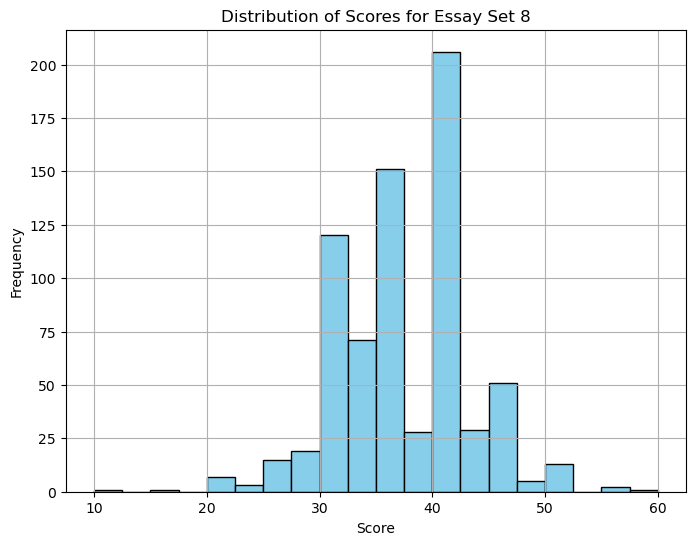

In [14]:
# Group the DataFrame by essay_set
grouped = df.groupby('essay_set')

# Calculate and print characteristics of the distribution for each essay set
for essay_set, group_data in grouped:
    print(f"Essay Set {essay_set}:")
    if essay_set == 2:
        scores_domain1 = group_data['domain1_score']
        scores_domain2 = group_data['domain2_score']
        
        # Calculate central tendency for domain1_score
        mean_score_domain1 = scores_domain1.mean()
        median_score_domain1 = scores_domain1.median()
        mode_score_domain1 = scores_domain1.mode()[0]
        
        # Calculate central tendency for domain2_score
        mean_score_domain2 = scores_domain2.mean()
        median_score_domain2 = scores_domain2.median()
        mode_score_domain2 = scores_domain2.mode()[0]
        
        # Print characteristics of the distribution for domain1_score
        print("Characteristics of domain1_score:")
        print("Mean Score:", mean_score_domain1)
        print("Median Score:", median_score_domain1)
        print("Mode Score:", mode_score_domain1)
        
        # Print characteristics of the distribution for domain2_score
        print("\nCharacteristics of domain2_score:")
        print("Mean Score:", mean_score_domain2)
        print("Median Score:", median_score_domain2)
        print("Mode Score:", mode_score_domain2)
        
        # Plot histogram of scores for domain1_score
        plt.figure(figsize=(8, 6))
        plt.hist(scores_domain1, bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of Scores for Essay Set {essay_set} (Domain 1)')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
        # Plot histogram of scores for domain2_score
        plt.figure(figsize=(8, 6))
        plt.hist(scores_domain2, bins=20, color='lightgreen', edgecolor='black')
        plt.title(f'Distribution of Scores for Essay Set {essay_set} (Domain 2)')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        scores = group_data['domain1_score']
        
        # Calculate central tendency
        mean_score = scores.mean()
        median_score = scores.median()
        mode_score = scores.mode()[0]  # Mode can return multiple values, so we take the first one
        
        # Print characteristics of the distribution
        print("Characteristics of domain1_score:")
        print("Mean Score:", mean_score)
        print("Median Score:", median_score)
        print("Mode Score:", mode_score)
        
        # Plot histogram of scores
        plt.figure(figsize=(8, 6))
        plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of Scores for Essay Set {essay_set}')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

After analyzing the distributions of scores for each essay_set, we found that
the score ranges vary across the essay_sets, with some sets having narrower ranges (sets 2 and 3) and others having wider ranges (sets 7 and 8). Based on this, we can see that for some scores we have an unequal score density distribution which suggests that within the different categories, we have an uneven dispersion of the scores. 

In [15]:
df_new = df.copy()

In [16]:
df_new

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


To resolve this issue of dataset imbalancing, several techniques come to mind including: SMOTE, ADASYN, and Random Over Sampling (ROS).
After certain reflexion regarding the SMOTE technique and its concepts, we didn't want to go to a normalization procedure that will get into the way of our goal. For essay scores, we definitely have grades outside the normalization interval [0-1]. For our application, if we proceeded with the normalization, we will have to bounce back from this normalization. Thus, we tried to avoid the SMOTE algorithm. Next, we started exploring the ADASYN technique, several problems arised. In fact, for our dataset, for the scores that were severly underrepresented, the ADASYN technique couldn't handle them. It was always generating an error since the ADASYN technique is based on k-neighboorhood density to oversample, for these cases with very few samples, it was unable to apply its k-neighboorhood density concepts and generate new synthetic samples. Finally, we were left with the random oversampling. Based on a bibliographical article [1],  ROS presented good results by comparaison to the remaining two-techniques, even though it was coupled with other ML concepts. This latter, gave us the motivation to use ROS to balance our dataset and check the behavior of our in-development model regarding this method of oversampling.

Since we are working on two variables to predict, we balenced the dataset according to each dataset with respect to each variable to predict. We will exclude from the oversampling our essays for sure. ROS can't oversample non-numerical values. 

In [17]:
# Initialize empty DataFrames to store resampled data
X_resampled_df = pd.DataFrame()
y_resampled_df = pd.DataFrame()

# Iterate over unique essay sets
for essay_set in df_new['essay_set'].unique():
    # Filter data for the current essay set
    df_essay_set = df_new[df_new['essay_set'] == essay_set]
    
    # Separate features (X) and target (y)
    X = df_essay_set.drop(columns=['domain1_score', 'domain2_score']) 
    y = df_essay_set['domain1_score']
    
    # Get the minimum value of y for the current essay set
    min_class_count = min(Counter(y).values())
    
    # Check if there is no minority class (all classes have the same count)
    if len(set(Counter(y).values())) <= 1:
        # Skip resampling and add the original data as it is
        X_resampled_df = pd.concat([X_resampled_df, X], ignore_index=True)
        y_resampled_df = pd.concat([y_resampled_df, y], ignore_index=True)
    else:
        # Apply Random Oversampling
        ros = RandomOverSampler()
        X_resampled, y_resampled = ros.fit_resample(X, y)
    
        # Concatenate resampled DataFrames
        X_resampled_df = pd.concat([X_resampled_df, pd.DataFrame(X_resampled)], ignore_index=True)
        y_resampled_df = pd.concat([y_resampled_df, pd.DataFrame(y_resampled)], ignore_index=True)

In [18]:
y_resampled_df['essay_set'] = X_resampled_df['essay_set']
y_resampled_df

,domain1_score,essay_set
0,8.0,1
1,9.0,1
2,7.0,1
3,10.0,1
4,8.0,1
...,...,...
34773,60.0,8
34774,60.0,8
34775,60.0,8
34776,60.0,8


In [19]:
X_resampled_df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6'],
      dtype='object')

In [20]:
# Filter essays corresponding to essay_ids in X_resampled_df
essay_df = df[df['essay_id'].isin(X_resampled_df['essay_id'])]

# Sort essay_df based on the order of essay_ids in X_resampled_df
essay_df = essay_df.set_index('essay_id').loc[X_resampled_df['essay_id']].reset_index()

# Reset the index of essay_df
essay_df.reset_index(drop=True, inplace=True)

#Selecting only 'essay_id' and 'essay' columns from essay_df
essay_df = essay_df[['essay_id', 'essay']]

After resampling, now, we will attach back our essays, each with respect to its correspondant id.

In [21]:
# Create a dictionary mapping essay_id to essay text
essay_dict = essay_df.set_index('essay_id')['essay'].to_dict()

# Add a new column 'essay' to X_resampled_df based on the 'essay_id' column
X_resampled_df['essay'] = X_resampled_df['essay_id'].map(essay_dict)

In [22]:
X_resampled_df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,rater1_trait1,rater1_trait2,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34773,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
34774,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
34775,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
34776,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN


After preparing our data, we will start with our feature engineering.

<div style="color:blue;"><h4>| Feature Engineering</h4></div>

In the following cell, we calculated the first feature: essay length (number of words - composition of each essay).

In [23]:
# Calculation of essay length
X_resampled_df['essay_length'] = X_resampled_df['essay'].apply(lambda x: len(x.split())) 

We plotted both a histogram and a boxplot to get a general overview of the distribution of the essay's length.

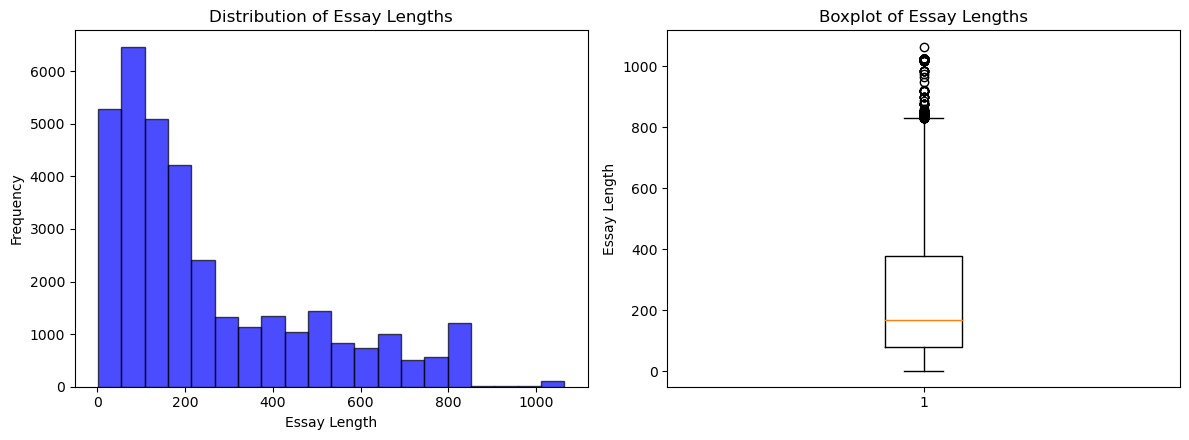

In [24]:
essay_lengths =X_resampled_df['essay_length']

# Preparing the plotting layout
fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot histogram on the first subplot
axs[0].hist(essay_lengths, bins=20, color='blue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribution of Essay Lengths')
axs[0].set_xlabel('Essay Length')
axs[0].set_ylabel('Frequency')

# Plot boxplot on the second subplot
axs[1].boxplot(essay_lengths)
axs[1].set_title('Boxplot of Essay Lengths')
axs[1].set_ylabel('Essay Length')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

The first inspection tells us that we have some really good amount of outliers in the distribution of our essay_lengths.

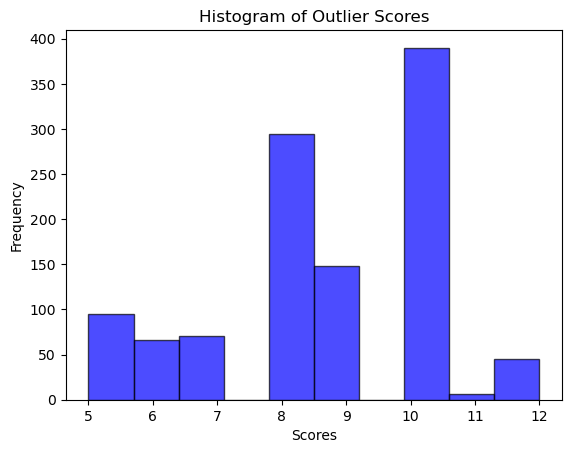

In [25]:
# Get the positions of outliers
outliers = axs[1].get_children()[6].get_ydata()

# Get the indices of outliers
outlier_indices = [idx for idx in outliers]

# Extract the scores of outliers from the original DataFrame
outlier_scores = y_resampled_df.iloc[outlier_indices]['domain1_score']

# # Print the scores of outliers
# print("Scores of outliers:", outlier_scores)

# Plot histogram of outlier scores
plt.hist(outlier_scores, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Outlier Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

First, we can notice that the frequency of the presence of outliers is high. Additionally, from the above plots, we can make a hypothesis that says, that our long essays are exhibiting high scores. In fact, since at the end, our goal is to predict a score, these outliers can contain valuable insights regarding our data. It is playing role in the scoring of its respective essays. So, based on this and their amount, we should keep them. Their presence is more valuable than their absence.

Second, when we looked into some essay examples, we noticed that some words were coded in a specific structure : "@" followed by a group of capital characters. Consequently, we decided to check these tagged words in the essays.
Extracting the tags in the essays:

In [26]:
print(essay_df['essay'][0])

Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy

In [27]:
# Extract the tags from all essays
special_words = extract_special_words_from_column(X_resampled_df['essay'])
# Group the tags that belong to the same category
categories = group_words_by_category(special_words)

Print the tagged words and their categorization respectively to have an idea of what tags are we dealing with:

In [28]:
print(special_words)

['@ORGANIZATION1,', '@ORGANIZATION2,', '@CAPS1,', "@DATE1's", '@CAPS2', '@CAPS1', '@CAPS2,', '@NUM1', '@MONTH1', '@LOCATION1.', '@LOCATION3.', '@LOCATION2.', '@NUM1', '@NUM3', '@NUM3', '@CAPS1', '@CAPS2', '@CAPS3', '@CAPS4,', '@MONTH1', '@CAPS5', '@ORGANIZATION1', '@CAPS1', '@PERCENT1', '@CAPS2', '@PERSON1', '@PERSON2', '@CAPS2', '@CAPS3', '@CAPS4', '@CAPS2', '@CAPS3', '@LOCATION2', '@PERCENT2', '@PERCENT3', '@PERCENT4', '@LOCATION1', '@PERCENT5', '@PERCENT2', '@CAPS2', '@CAPS3', '@CAPS5', '@CAPS6', '@CAPS7', '@CAPS2', '@NUM1', '@ORGANIZATION1', '@PERCENT1', '@ORGANIZATION1', '@PERCENT5', '@CAPS8', '@NUM2', '@CAPS3', '@CAPS3', '@ORGANIZATION1', '@PERSON3,', "@ORGANIZATION2's", '@CAPS2', '@CAPS3', '@NUM3', '@LOCATION3.', '@LOCATION1,', '@NUM1', '@LOCATION2', '@CAPS1', '@LOCATION1,', '@NUM1', '@NUM2.', '@NUM3', '@CAPS1', '@CAPS2', '@NUM4', '@CAPS2', '@CAPS3', '@MONTH1', '@CAPS1', '@PERCENT1', '@NUM1', '@CAPS1', '@NUM1', '@CAPS1', '@CAPS1', '@PERCENT1', '@ORGANIZATION1', '@NUM1', '@NUM2',

Next, after inspecting the tags, we noticed that they can be grouped in several categories. So, we divided them each into its suitable category:

In [29]:
print(categories)

['ORGANIZATION', 'CAPS', 'DATE', 'NUM', 'MONTH', 'LOCATION', 'PERCENT', 'PERSON', 'TIME', 'MONEY', 'DR', 'CITY', 'STATE', 'EMAIL']


After extracting the tags, and grouping them into the categories they belong to, in each essay, we assessed how many tags belong to each category. This assessment was added to our data-set, in case we decide to benefit from it as features later on when training our ML model.

In [30]:
X_resampled_df = process_essays(X_resampled_df, categories)

In [31]:
X_resampled_df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tag_counts'],
      dtype='object')

Print the results of this assessment

In [32]:
X_resampled_df['tag_counts']

0        {'ORGANIZATION': 2, 'CAPS': 2, 'DATE': 1, 'NUM...
1        {'ORGANIZATION': 0, 'CAPS': 2, 'DATE': 0, 'NUM...
2        {'ORGANIZATION': 1, 'CAPS': 5, 'DATE': 0, 'NUM...
3        {'ORGANIZATION': 4, 'CAPS': 20, 'DATE': 0, 'NU...
4        {'ORGANIZATION': 0, 'CAPS': 1, 'DATE': 0, 'NUM...
                               ...                        
34773    {'ORGANIZATION': 3, 'CAPS': 14, 'DATE': 0, 'NU...
34774    {'ORGANIZATION': 3, 'CAPS': 14, 'DATE': 0, 'NU...
34775    {'ORGANIZATION': 3, 'CAPS': 14, 'DATE': 0, 'NU...
34776    {'ORGANIZATION': 3, 'CAPS': 14, 'DATE': 0, 'NU...
34777    {'ORGANIZATION': 3, 'CAPS': 14, 'DATE': 0, 'NU...
Name: tag_counts, Length: 34778, dtype: object

So, the variable type tag_counts is not useful with its actual structure. In order for it to serve us later on in our ML model, we started with counting the frequency of the tagged words from all categories in each essay.

In [33]:
X_resampled_df['total_tags'] = X_resampled_df['tag_counts'].apply(lambda x: sum(x.values()))

Since each essay has a distinct length, the count of tags can't be really representative unless we calculate their percentage of occurance within each essay (their % with respect to the total essay length). 

In [34]:
X_resampled_df['tags_percentage'] =(X_resampled_df['total_tags'] /X_resampled_df['essay_length']) * 100

In [35]:
X_resampled_df['tags_percentage']

0        1.479290
1        2.386635
2        2.508961
3        7.824427
4        0.860215
           ...   
34773    4.103343
34774    4.103343
34775    4.103343
34776    4.103343
34777    4.103343
Name: tags_percentage, Length: 34778, dtype: float64

We can think about adding a boolean if we want that can tell us if we have a tag or not in the essay. But since we are dealing with numbers, and we will be predicting scores, 0 and 1 can interfere in the training of our model. So this feature will be ignored. However, we will still preprocess it to get an idea about its relevance in our essays in general.

In [36]:
# Add a boolean 'has_category' column
X_resampled_df['contains_tag'] =  (X_resampled_df['essay'].str.contains('@')).astype(int)

# Check the results
print(X_resampled_df)

       essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
34773     20826          8   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...   
34774     20826          8   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...   
34775     20826          8   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...   
34776     20826          8   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...   
34777     20826          8   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...   

       rater1_domain1  rate

A small visualization only to check the proportions of the essays containing tags

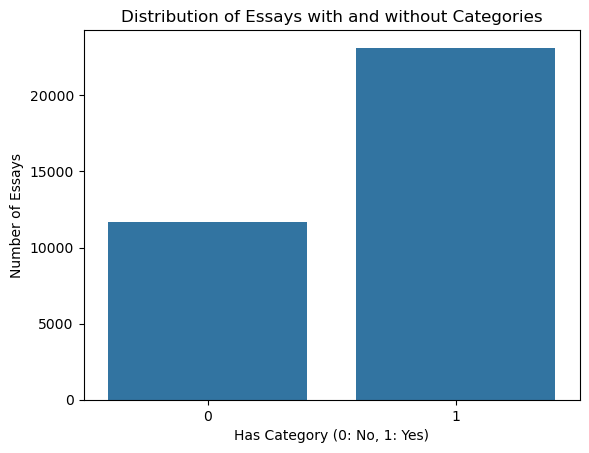

In [37]:
# Plot the distribution of essays with and without categories
sns.countplot(x='contains_tag', data=X_resampled_df)
plt.title('Distribution of Essays with and without Categories')
plt.xlabel('Has Category (0: No, 1: Yes)')
plt.ylabel('Number of Essays')
plt.show()

Now after dealing with the presence of tags, this tags percentage can serve as a feature later on for our ML model training. We will proceed with dropping 'tag_counts', 'total_tags' and 'contains_tag'. As explained earlier, the type format of tag_counts isn't suitable for our ML model training. However total_tags represent the total number of tags in each essay. But since, this characteristic depends heavily on the length of our essay (10 tags in 40 words essay is different than 10 tags in 300 words essay) we will save the tags_percentage.

In [38]:
X_resampled_df.drop(columns=['tag_counts', 'total_tags', 'contains_tag'], inplace=True)
X_resampled_df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage'],
      dtype='object')

Next, we will move on to the organization and structures of our essays since it plays a big role in scoring guidelines.

First, we will start with the ratio of sentences to paragraphs. The sentence-to-paragraph ratio in essay writing can provide valuable insights into various aspects of the writing style and content. It might contains information about how much our essay is detailed. Coupled with other features (that will be mentioned later such as linking words for example), it will tell us about how much details we have, if our essays are cohesive, etc..

In [39]:
X_resampled_df['sent/leng ratio'] = X_resampled_df['essay'].apply(calculate_sentences_to_paragraphs_ratio)

Now, we will move to existing libraries dedicated for language processing. In the context of Natural Language Processing (NLP), spaCy is a popular open-source library used for various NLP tasks such as tokenization and part-of-speech tagging. Since this concept is computationally expensive, i decided to calculate it independantely and add it to our data while taking into consideration of course the correct tokenization for the correct essay_id. Thus whenever we need it in our code we will have it already computed. In other words, we computed it once for all and since it is a non-numerical value that won't serve us later on for our model, we will drop it at the end.

In [40]:
df['nlp_spacy'] = df['essay'].apply(calculate_nlp)

In [41]:
X_resampled_df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,rater1_trait1,rater1_trait2,...,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,essay_length,tags_percentage,sent/leng ratio
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338,1.479290,11.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419,2.386635,19.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279,2.508961,15.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,7.824427,25.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465,0.860215,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34773,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,658,4.103343,81.0
34774,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,658,4.103343,81.0
34775,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,658,4.103343,81.0
34776,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,658,4.103343,81.0


To preserve our data we copied it, and we added to each essay its corresponding nlp_spacy configuration.

In [42]:
x = X_resampled_df.copy()
# Merge the two dataframes on the 'essay_id' column
x = x.merge(df[['essay_id', 'nlp_spacy']], on='essay_id', how='left')

In [43]:
x

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,rater1_trait1,rater1_trait2,...,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,essay_length,tags_percentage,sent/leng ratio,nlp_spacy
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,524,7.824427,25.0,"(Dear, Local, Newspaper, ,, @CAPS1, I, have, f..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,465,0.860215,31.0,"(Dear, @LOCATION1, ,, I, know, having, compute..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34773,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,658,4.103343,81.0,"( , Bell, rings, ., , Shuffle, ,, shuffle, .,..."
34774,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,658,4.103343,81.0,"( , Bell, rings, ., , Shuffle, ,, shuffle, .,..."
34775,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,658,4.103343,81.0,"( , Bell, rings, ., , Shuffle, ,, shuffle, .,..."
34776,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,658,4.103343,81.0,"( , Bell, rings, ., , Shuffle, ,, shuffle, .,..."


 Now after tokenization, we will check the sentence length variation.

In [44]:
x['sentence_length_variation'] = x['nlp_spacy'].apply(calculate_sentence_length_variation)
print(x['sentence_length_variation'])

0        221.464844
1        162.160000
2        165.840000
3        153.185185
4         49.462222
            ...    
34773     51.440334
34774     51.440334
34775     51.440334
34776     51.440334
34777     51.440334
Name: sentence_length_variation, Length: 34778, dtype: float64


We will plot the variation of the length of the sentences just to have a general idea

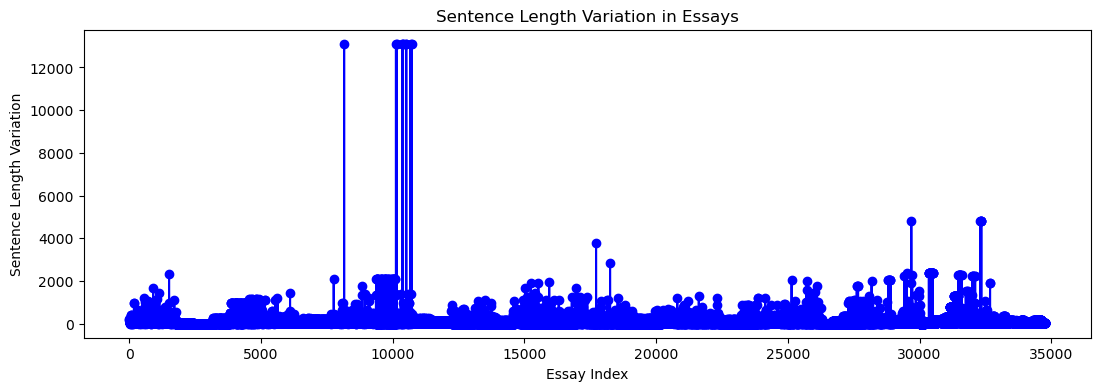

In [45]:
# Plot the variation in average sentence lengths
plt.figure(figsize=(13, 4))
plt.plot(x['sentence_length_variation'], marker='o', linestyle='-', color='b')
plt.title('Sentence Length Variation in Essays')
plt.xlabel('Essay Index')
plt.ylabel('Sentence Length Variation')
plt.show()

We can clearly see some outliers as well.

Next, we will look up for transition words.They play a key role in ensuring the coherence, flow and organization of an essay. Additionally, as mentioned in the feature before, they improve the overall structure and clarity which definitely plays an important role in assessing any writing. Additionally, the use of transition words not only serves in understanding the essay, but also it shows the writer's ability to logically connect ideas and create a complex essay.

In [46]:
x['transition_words_counts']= x['nlp_spacy'].apply(count_transition_words)

Next, we will move to the CTTR : Corrected Type Token Ratio.

CTTR is a measure of lexical diversity in a text. It calculates the ratio of unique words to the square root of twice the total number of words divided by the number of unique words. This ratio is used to estimate the lexical richness or diversity of the text. A higher CTTR indicates greater lexical diversity, suggesting a wider range of vocabulary usage.

In [47]:
x['cttr'] = x['essay'].apply(lambda r : calculate_cttr(r))

And now, the number of sentences:

By quantifying the sentence count, we gain insights into the structural complexity and coherence of the essay's content. Coupled with transition words count, and the sentence lengths, etc.. it will provide very rich information regarding our essays.

In [48]:
x['num_sentences'] = x['essay'].apply(count_sentences)
# Display the DataFrame with the new column
print(x[['essay', 'num_sentences']])

                                                   essay  num_sentences
0      Dear local newspaper, I think effects computer...             16
1      Dear @CAPS1 @CAPS2, I believe that using compu...             20
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...             14
3      Dear Local Newspaper, @CAPS1 I have found that...             26
4      Dear @LOCATION1, I know having computers has a...             30
...                                                  ...            ...
34773   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...             83
34774   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...             83
34775   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...             83
34776   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...             83
34777   Bell rings.  Shuffle, shuffle. @CAPS1. Snap. ...             83

[34778 rows x 2 columns]


We plot the results just to check the tendancy of number of sentences distribution over our essays

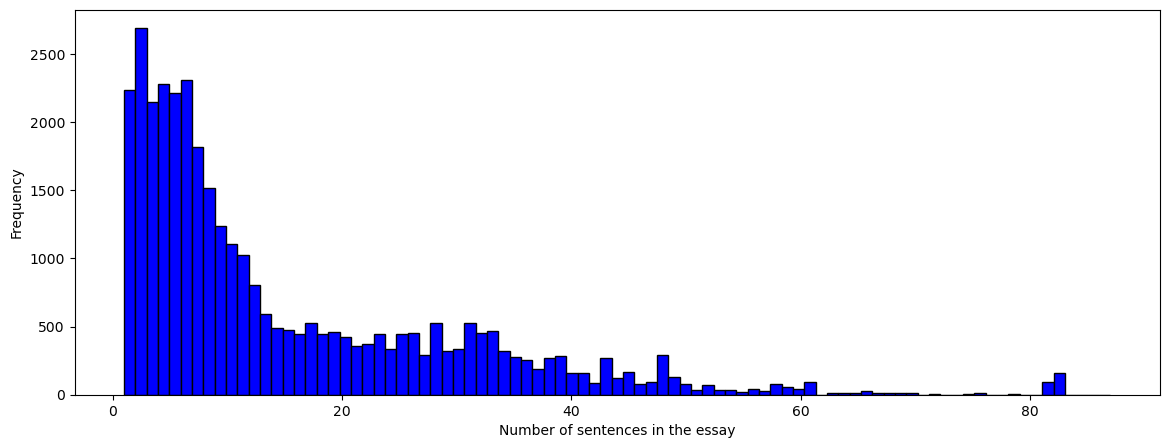

In [49]:
plt.figure(figsize=(14,5))
plt.hist(x['num_sentences'], bins=np.max(x['num_sentences']), color='blue', edgecolor='black')
# Add labels and title
plt.xlabel('Number of sentences in the essay')
plt.ylabel('Frequency')
plt.show()

One remark draws our attention in this diagram, we have essays with a rather small number of sentences. Let's check if we have any essay composed of a single sentence.

In [50]:
one_sentence_essays = x[x['num_sentences'] == 1]

# Print the number of essays with only 1 sentence
print(f"Number of essays with only 1 sentence: {len(one_sentence_essays)}")


Number of essays with only 1 sentence: 2238


Since we have this amount of data, (2267 essays) with only one sentence, it draws our attention to take into consideration, as it represents a portion of our whole dataset. Additionally, it plays a role in the scoring.

Now, we will  check the Average length of the sentences

Text(0, 0.5, 'Average Sentence Length')

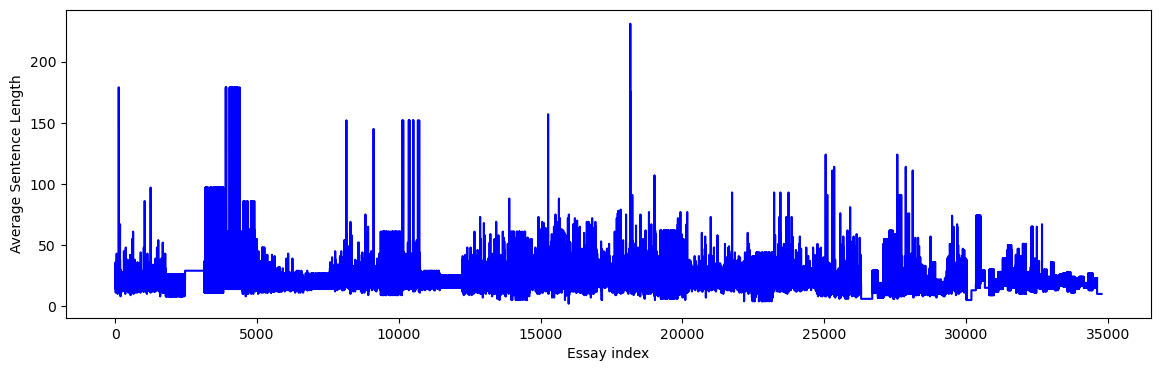

In [51]:
x['avg_sen_leng'] =x['nlp_spacy'].apply(average_sentence_length)

plt.figure(figsize=(14,4))
plt.plot(x['avg_sen_leng'], color = 'b')
plt.xlabel('Essay index')
plt.ylabel('Average Sentence Length')

In this feature, we decided to check the tendancy of the length of our essay sentences. In fact, such feature combined with more other features (we will evoke next), will have its own impact on the essays scoring.

Now, we will continue with the Readability of our essays.

First measure that will be checked to compute text complexity based on words and word structure will be the: Flesch-Reading Ease.
The Flesch Reading Ease score is a metric used to evaluate the readability of a text based on its linguistic complexity. It calculates a numerical score that indicates how easy or difficult it is to understand a piece of writing. The score is based on factors such as the average sentence length and the average number of syllables per word. A higher Flesch Reading Ease score suggests that the text is easier to read, with simpler sentences and words, while a lower score indicates more complex language and potentially harder readability.


In [52]:
x['flesch_reading_ease'] = x['essay'].apply(lambda a: textstat.flesch_reading_ease(a))

Second measure will be the Gunning Fog index

It measures the complexity of a passage by analyzing the average number of words per sentence and the percentage of complex words (words with three or more syllables). The index provides an approximate grade level required to understand the text, with higher scores indicating more difficult readability. A higher Gunning Fog Index score suggests that the text is more challenging to read, while a lower score indicates easier readability.

In [53]:
# Add a new column for Gunning Fog Index scores
x['gunning_fog_index'] = x['essay'].apply(lambda x: textstat.gunning_fog(x))

In [54]:
x

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,rater1_trait1,rater1_trait2,...,tags_percentage,sent/leng ratio,nlp_spacy,sentence_length_variation,transition_words_counts,cttr,num_sentences,avg_sen_leng,flesch_reading_ease,gunning_fog_index
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",221.464844,13,57.735027,16,25,74.02,10.31
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",162.160000,21,68.525311,20,23,67.08,10.21
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,NaN,NaN,NaN,NaN,...,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",165.840000,17,53.156198,14,21,68.20,10.25
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,7.824427,25.0,"(Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",153.185185,17,96.234090,26,22,60.24,10.81
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.860215,31.0,"(Dear, @LOCATION1, ,, I, know, having, compute...",49.462222,19,70.329852,30,18,72.66,8.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34773,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,4.103343,81.0,"( , Bell, rings, ., , Shuffle, ,, shuffle, .,...",51.440334,34,134.575276,83,10,86.10,5.94
34774,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,4.103343,81.0,"( , Bell, rings, ., , Shuffle, ,, shuffle, .,...",51.440334,34,134.575276,83,10,86.10,5.94
34775,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,4.103343,81.0,"( , Bell, rings, ., , Shuffle, ,, shuffle, .,...",51.440334,34,134.575276,83,10,86.10,5.94
34776,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,4.103343,81.0,"( , Bell, rings, ., , Shuffle, ,, shuffle, .,...",51.440334,34,134.575276,83,10,86.10,5.94


Next feature will be Misspelling.

We will check the mispelling rate in each essay. Misspelling refers to the incorrect spelling of words in written text. It occurs when a word is written with letters that do not match the accepted spelling of that word in a particular language. For this purpose, we will use a language-check git that will provide us with developped libraries of spelling specific functions.

In [55]:
!pip install git+https://github.com/MCFreddie777/language-check.git

  Cloning https://github.com/MCFreddie777/language-check.git to c:\users\saleh\appdata\local\temp\pip-req-build-8jv8ds0m
  Resolved https://github.com/MCFreddie777/language-check.git to commit 337493f25b5a49af0a09b0e264f306eccefaff8f
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/MCFreddie777/language-check.git 'C:\Users\SALEH\AppData\Local\Temp\pip-req-build-8jv8ds0m'


In [56]:
# Apply spell checker to each essay
x['misspelled_words'] = x['essay'].apply(check_spelling_pyspellchecker)

# Calculate misspelling score for each essay
x['misspelling_score'] = x['misspelled_words'].apply(len)

Additionally, just like the tags, the length of our essay plays a role in how significant is the effect of our misspelled words, thus we will proceed with calculating the misspelled_percentage and dropping the rest.

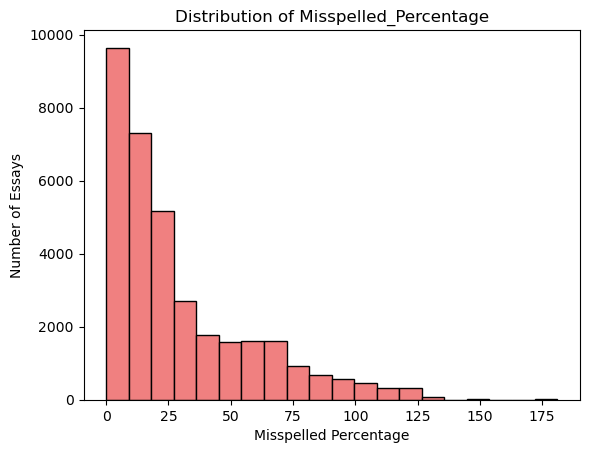

In [57]:
x['misspelled_percentage'] = (x['misspelling_score'] / x['essay_length']) * 100

# Calculate misspelling score
x['misspelled_percentage'] = x['misspelled_words'].apply(len)

# Visualize distribution of misspelling scores
plt.hist(x['misspelled_percentage'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Misspelled_Percentage')
plt.xlabel('Misspelled Percentage')
plt.ylabel('Number of Essays')
plt.show()

In [58]:
x.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'nlp_spacy', 'sentence_length_variation', 'transition_words_counts',
       'cttr', 'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_words', 'misspelling_score',
       'misspelled_percentage'],
      dtype='object')

Since the misspelled_words and misspelling_score columns won't serve us in training our ML model, we will drop it. Similarly to what we did when dealing with the tags.

In [59]:
x.drop(columns = ['misspelled_words', 'misspelling_score'], inplace = True)
x.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'nlp_spacy', 'sentence_length_variation', 'transition_words_counts',
       'cttr', 'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage'],
      dtype='object')

Next, we went forward with analyzing the composition of each sentence : Adjectives,  Adverbs, Nouns and Verbs count.

Analyzing how often different types of words like describing words (adjectives), action words (verbs), and others appear in an essay, help us to identify if a text can be descriptive or not, etc... This is recommended according to the scoring guidelines of our essays. Additionally, to have a representive result, we went with the calculating the percentage of every word type to get a fair comparaison between essays.

In [60]:
# Apply the function to the DataFrame
df_new['adjectives (%)'],df_new['adverbs (%)'],df_new['nouns (%)'],df_new['verbs (%)']= zip(*df_new['essay'].apply(count_pos))

In [61]:
# Merge the results based on essay_id
x = pd.merge(x, df_new[['essay_id', 'adjectives (%)', 'adverbs (%)', 'nouns (%)', 'verbs (%)']], on='essay_id', how='left')

In [62]:
x.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'nlp_spacy', 'sentence_length_variation', 'transition_words_counts',
       'cttr', 'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)'],
      dtype='object')

Just to make sure that our features don't have any Nan unacceptable value, we checked the columns that contain any Nan Value.

In [63]:
x

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,rater1_trait1,rater1_trait2,...,cttr,num_sentences,avg_sen_leng,flesch_reading_ease,gunning_fog_index,misspelled_percentage,adjectives (%),adverbs (%),nouns (%),verbs (%)
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,57.735027,16,25,74.02,10.31,43,4.922280,5.958549,20.725389,17.616580
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,68.525311,20,23,67.08,10.21,41,3.663793,3.879310,23.275862,18.318966
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,NaN,NaN,NaN,NaN,...,53.156198,14,21,68.20,10.25,28,6.070288,4.792332,25.559105,16.613419
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,96.234090,26,22,60.24,10.81,78,6.710311,4.746318,28.150573,15.711948
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,70.329852,30,18,72.66,8.01,48,5.802708,7.350097,21.856867,16.634429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34773,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,134.575276,83,10,86.10,5.94,125,4.567308,6.250000,20.312500,16.225962
34774,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,134.575276,83,10,86.10,5.94,125,4.567308,6.250000,20.312500,16.225962
34775,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,134.575276,83,10,86.10,5.94,125,4.567308,6.250000,20.312500,16.225962
34776,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,134.575276,83,10,86.10,5.94,125,4.567308,6.250000,20.312500,16.225962


In [64]:
columns_with_nan = x.columns[x.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5', 'rater3_trait6']


In [65]:
x.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'nlp_spacy', 'sentence_length_variation', 'transition_words_counts',
       'cttr', 'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)'],
      dtype='object')

Based on the following publication [5], we were able to extend more our feature set.

We will start with computing some basic lexical characteristics. 

- Long Word Token Ratio:
This feature calculates the ratio of word tokens with more than 6 characters to the total number of word tokens in the essay. It provides insights into the complexity or verbosity of the language used.

- Short Word Token Ratio:
This feature computes the ratio of word tokens with less than 4 characters to the total number of word tokens in the essay. It offers insights into the prevalence of short words.

- Lemma Token Ratio:
This feature calculates the ratio of unique lemmas to the total number of word tokens in the essay. It indicates the lexical richness or diversity of the vocabulary used.

- Token Sentence Ratio:
This feature determines the ratio of word tokens to the number of sentences in the essay. It gives an indication of the average  complexity of sentences in the text.

- Non-Initial Caps Word Ratio:
This feature measures the ratio of non-initial capital words to the number of sentences in the essay. It provides insights into the usage of formal language and proper nouns.

- Char Sentence Ratio:
This feature computes the ratio of characters (excluding punctuation) to the number of sentences in the essay. It offers insights into the average length of sentences or the density of information conveyed per sentence.

In [66]:
#Applying our functions related to lexical composition:
x['long_word_token_ratio'] = x['nlp_spacy'].apply(lambda doc: long_word_token_ratio(doc))
print("Long_word_token_ratio : Done")
x['short_word_token_ratio'] = x['nlp_spacy'].apply(lambda doc: short_word_token_ratio(doc))
print("Short_word_token_ratio : Done")
x['lemma_token_ratio'] = x['nlp_spacy'].apply(lambda doc: lemma_token_ratio(doc))
print("Lemma_token_ratio: Done")
x['token_sentence_ratio'] = x.apply(lambda row: token_sentence_ratio(row['nlp_spacy'], row['num_sentences']), axis=1)
print("Token_sentence_ratio : Done")
x['non_initial_caps_word_ratio'] = x.apply(lambda row: non_initial_caps_word_ratio(row['nlp_spacy'], row['num_sentences']), axis=1)
print("Non_initial_caps_word_ratio : Done")
x['char_sentence_ratio'] = x.apply(lambda row: char_sentence_ratio(row['nlp_spacy'], row['num_sentences']), axis=1)
print("Char_sentence_ratio : Done")

Long_word_token_ratio : Done
Short_word_token_ratio : Done
Lemma_token_ratio: Done
Token_sentence_ratio : Done
Non_initial_caps_word_ratio : Done
Char_sentence_ratio : Done


Now, we will calculate more features related to linguistic characteristics and complexity of the essays:
- Fourth Root of the Number of Word Tokens:
This feature represents a non-linear transformation of the total number of word tokens in the essay. Taking the fourth root of the word token count is a way to scale down the influence of extreme values while still considering the overall magnitude of the vocabulary used in the essay. It's based on the idea that larger essays may have a wider range of vocabulary.

- OVIX:
The Word Variation Index (OVIX) measures the diversity of vocabulary used in the essay. It's calculated by dividing the total number of word tokens by the complement of the percentage of nouns. This index gives a measure of the variation in non-nominal vocabulary, excluding nouns. A higher OVIX indicates greater lexical diversity.

- Nominal Ratio (NR):
The Nominal Ratio (NR) measures the density of nominal (noun-based) vocabulary in the essay. It's calculated by dividing the total number of nouns by the complement of the percentage of nouns. NR provides an indication of the proportion of noun-based language used in the essay relative to non-noun language. A higher NR suggests a greater reliance on nouns for expression.

In [67]:
x['fourth_root_word_tokens'] = x['nlp_spacy'].apply(lambda doc: fourth_root_word_tokens(doc))
print("Fourth_root_word_tokens : Done")
x['word_variation_index'] = x.apply(lambda row: word_variation_index(row['nlp_spacy'], row['nouns (%)']), axis=1)
print("Word_variation_index : Done")
x['nominal_ratio'] = x.apply(lambda row: nominal_ratio(row['nlp_spacy'], row['nouns (%)']), axis=1)
print("Nominal_ratio: Done")

Fourth_root_word_tokens : Done
Word_variation_index : Done
Nominal_ratio: Done


In [68]:
x

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,rater1_trait1,rater1_trait2,...,verbs (%),long_word_token_ratio,short_word_token_ratio,lemma_token_ratio,token_sentence_ratio,non_initial_caps_word_ratio,char_sentence_ratio,fourth_root_word_tokens,word_variation_index,nominal_ratio
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,17.616580,0.164706,0.441176,0.414706,21.250000,20.062500,88.875000,4.294076,428.888889,97.130719
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,18.318966,0.187805,0.421951,0.392683,20.500000,19.250000,87.950000,4.499829,534.382022,130.337079
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,NaN,NaN,NaN,NaN,...,16.613419,0.187500,0.448529,0.455882,19.428571,18.142857,84.142857,4.061086,365.390558,95.377682
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,15.711948,0.232990,0.381443,0.408247,18.653846,17.653846,87.307692,4.692837,675.022779,187.892938
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,16.634429,0.183585,0.429806,0.367171,15.433333,14.400000,67.033333,4.638689,592.502475,139.487624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34773,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,16.225962,0.162461,0.451104,0.429022,7.638554,6.506024,31.746988,5.017904,795.607843,144.313725
34774,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,16.225962,0.162461,0.451104,0.429022,7.638554,6.506024,31.746988,5.017904,795.607843,144.313725
34775,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,16.225962,0.162461,0.451104,0.429022,7.638554,6.506024,31.746988,5.017904,795.607843,144.313725
34776,20826,8,"Bell rings. Shuffle, shuffle. @CAPS1. Snap. ...",30.0,30.0,NaN,NaN,NaN,6.0,6.0,...,16.225962,0.162461,0.451104,0.429022,7.638554,6.506024,31.746988,5.017904,795.607843,144.313725


- Conjunction Ratio:
This feature calculates the ratio of conjunctions (words used to connect clauses or sentences) to the total number of word tokens in the essay. It provides insight into the frequency of conjunctions used to connect ideas or clauses within the text.

- Subconjunction Ratio:
This feature calculates the ratio of subordinating conjunctions (words used to introduce subordinate clauses) to the total number of word tokens in the essay. It indicates how often subordinating conjunctions are used to introduce dependent clauses, providing information about the complexity of sentence structures.

- Genitive Form Ratio:
This feature calculates the ratio of genitive forms (possessive forms of nouns) to the total number of nouns in the essay. It offers insights into the frequency of possessive constructions, indicating relationships of possession or association between entities mentioned in the text.

In [69]:
# Apply the functions to your DataFrame x
x['conjunction_ratio'] = x['nlp_spacy'].apply(lambda doc: conjunction_ratio(doc))
print("Conjunction_ratio : Done")
x['subjunction_ratio'] = x['nlp_spacy'].apply(lambda doc: subjunction_ratio(doc))
print("Subconjunction_ratio : Done")
x['genitive_form_ratio'] = x['nlp_spacy'].apply(lambda doc: genitive_form_ratio(doc))
print("genitive_form_ratio : Done")

Conjunction_ratio : Done
Subconjunction_ratio : Done
genitive_form_ratio : Done


On the other hand, a good idea would be to dive into the punctuation of our essays. Punctuation, coupled with the number of sentences, length of the sentences, etc... serves as a missing piece for the combination of these lexical and grammatical features.
- Minor Delimiter Ratio:
This feature calculates the ratio of minor delimiters (e.g., commas, dashes, parentheses) to the total number of word tokens in the essay. It provides information about the frequency of minor punctuation marks used for syntactic structuring or clarification within sentences.

- Major Delimiter Ratio:
This feature calculates the ratio of major delimiters (e.g., periods, question marks, exclamation marks) to the total number of word tokens in the essay. It indicates the frequency of major punctuation marks used to indicate the end of sentences or convey different sentence types (e.g., declarative, interrogative, exclamatory).

- Particle Ratio:
This feature calculates the ratio of particles (grammatical words that do not fit into traditional parts of speech categories) to the total number of word tokens in the essay. It provides insights into the frequency of particles used for various grammatical functions such as expressing modality, aspect, or emphasis.

- Relative Adverb Ratio:
This feature calculates the ratio of relative adverbs (adverbs that introduce relative clauses) to the total number of word tokens in the essay. It indicates how often relative adverbs are used to introduce clauses that provide additional information about a noun or pronoun in the text.

In [70]:
# Apply the functions to your DataFrame x
x['minor_delimiter_ratio'] = x['nlp_spacy'].apply(lambda doc: minor_delimiter_ratio(doc))
print("Minor delimiter_ratio : Done")
x['major_delimiter_ratio'] = x['nlp_spacy'].apply(lambda doc: major_delimiter_ratio(doc))
print("Major delimiter_ratio : Done")
x['particle_ratio'] = x['nlp_spacy'].apply(lambda doc: particle_ratio(doc))
print("Particle_ratio : Done")
x['relative_adverb_ratio'] = x['nlp_spacy'].apply(lambda doc: relative_adverb_ratio(doc))
print("Relative_ratio : Done")

Minor delimiter_ratio : Done
Major delimiter_ratio : Done
Particle_ratio : Done
Relative_ratio : Done


In [71]:
x.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'nlp_spacy', 'sentence_length_variation', 'transition_words_counts',
       'cttr', 'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'long_word_token_ratio',
       'short_word_token_ratio', 'lemma_token_ratio', 'token_sentence_ratio',
       'non_initial_caps_word_ratio', 'char_sentence_ratio',
       'fourth_root_word_tokens', 'wo

To complete the set of features involved in determining the percentage of nouns, verbs, asjectives and adverbs, we proceeded forward with calculating additional features that complements them:
- Determiner Ratio (DT):
This feature calculates the ratio of determiners (words that introduce nouns and clarify which nouns are being referred to, such as "the", "a", "an", "this", "that", etc.) to the total number of word tokens in the essay. It provides insights into the frequency of determiners used to specify or identify nouns within the text.

- Interrogative Relative Determiner Ratio (HD):
This feature calculates the ratio of interrogative relative determiners (words used to introduce interrogative relative clauses and include "which", "whose", "what", etc.) to the total number of word tokens in the essay. It indicates how often interrogative relative determiners are used to introduce clauses that ask questions or provide additional information about a noun or pronoun in the text.

- Participle Ratio (PC):
This feature calculates the ratio of participles (verb forms that function as adjectives and end in "-ing" in English, such as "running", "swimming", "dancing", etc.) to the total number of word tokens in the essay. It offers insights into the frequency of participles used to modify nouns or convey continuous actions within the text.

In [72]:
x['determiner_ratio'] = x['nlp_spacy'].apply(lambda doc: determiner_ratio(doc))
print("Determiner_ratio: Done")
x['interrogative_relative_determiner_ratio'] = x['nlp_spacy'].apply(lambda doc: interrogative_relative_determiner_ratio(doc))
print("Interrogative_ratio: Done")
x['participle_ratio'] = x['nlp_spacy'].apply(lambda doc: participle_ratio(doc))
print("Participle_ratio: Done")

Determiner_ratio: Done
Interrogative_ratio: Done
Participle_ratio: Done


Similarly, to empower the grammatical diversity and linking set of features, additional features are calculated:
- Paired Delimiter Ratio (PAD):
This feature calculates the ratio of paired delimiters (such as parentheses, brackets, etc.) to the total number of word tokens in the document. It provides insights into the frequency of using paired delimiters for grouping or enclosing elements within the text.

- Passive Voice Ratio:
This feature calculates the ratio of passive voice sentences to the total number of sentences in the document. It indicates the proportion of sentences in passive voice, where the subject receives the action of the verb, compared to the total number of sentences.

- Active Voice Ratio:
This feature calculates the ratio of active voice sentences to the total number of sentences in the document. It indicates the proportion of sentences in active voice, where the subject performs the action of the verb, compared to the total number of sentences.

- Possessive Form Ratio (PS):
This feature calculates the ratio of possessive forms (such as 's or ') to the total number of word tokens in the document. It provides insights into the frequency of possessive constructions indicating ownership or association between entities mentioned in the text.

- Preposition Ratio (PP):
This feature calculates the ratio of prepositions to the total number of word tokens in the document. It provides insights into the frequency of prepositions used to indicate relationships between nouns, pronouns, and other words in the text.

- Adjective Ratio (JJ):
This feature calculates the ratio of adjectives to the total number of word tokens in the document. It provides insights into the frequency of adjectives used to describe or modify nouns or pronouns in the text.

In [73]:
# Apply the functions to your DataFrame x
x['paired_delimiter_ratio'] = x['nlp_spacy'].apply(lambda doc: paired_delimiter_ratio(doc))
print("Paired_delimiter_ratio : Done")
x['passive_voice_ratio'] = x['nlp_spacy'].apply(lambda doc: passive_voice_ratio(doc))
print("Passive_voice_ratio : Done")
x['active_voice_ratio'] = x['nlp_spacy'].apply(lambda doc: active_voice_ratio(doc))
print("Active_voice_ratio : Done")
x['possessive_form_ratio'] = x['nlp_spacy'].apply(lambda doc: possessive_form_ratio(doc))
print("Possessive_form_ratio : Done")
x['preposition_ratio'] = x['nlp_spacy'].apply(lambda doc: preposition_ratio(doc))
print("Preposition_ratio : Done")
x['adjective_ratio'] = x['nlp_spacy'].apply(lambda doc: adjective_ratio(doc))
print("Adjective_ratio : Done")

Paired_delimiter_ratio : Done
Passive_voice_ratio : Done
Active_voice_ratio : Done
Possessive_form_ratio : Done
Preposition_ratio : Done
Adjective_ratio : Done


Moreover,new features were introduced to assist their predecessors (such as the punctuation features, etc..):
- Interrogative Relative Pronoun Ratio (HP):
This feature calculates the ratio of interrogative relative pronouns (such as "who", "whom", "whose", "which", "what", etc.) to the total number of word tokens. It provides insights into the frequency of interrogative relative pronouns used in the text.

- Foreign Word Ratio (UO):
This feature calculates the ratio of foreign words (words from languages other than English) to the total number of word tokens. It indicates the presence and frequency of foreign language elements in the text.

- Counting Word Ratio (RG):
This feature calculates the ratio of counting words (numerical words representing quantities) to the total number of word tokens. It provides insights into the usage of numerical counting words in the text.

- Ordinal Counting Word Ratio (RO):
This feature calculates the ratio of ordinal counting words (numerical words representing order or position) to the total number of word tokens. It indicates the frequency of ordinal counting words used in the text.

- Pronoun Ratio (PN):
This feature calculates the ratio of pronouns to the total number of word tokens. It provides insights into the frequency of pronouns used in the text.

- Pronoun in Object Form Ratio (OBJ):
This feature calculates the ratio of pronouns in object form (pronouns functioning as objects in sentences) to the total number of pronouns. It indicates the frequency of pronouns used as objects in relation to all pronouns used in the text.

- Verb Ratio (VB):
This feature calculates the ratio of verbs to the total number of word tokens. It provides insights into the frequency of verbs used in the text.

<font color='red'><h4>| Attention:</h4></font> These features such as Verb Ratio (VR), Nominal Ratio (NR) etc... differ from Verb percentage, noun percentage, etc... In fact for these percentages, we were investigating the  the simple percentage representing the proportions of each type with respect to all the words in the essay. However, when it comes to Nominal Ratio for example, it represents the proportion of nouns with respect to the other types of words in the essyas (non nouns words). The same applies for the reamining "looking-alike" features.

In [74]:
# Apply the functions to your DataFrame x
x['interrogative_relative_pronoun_ratio'] = x['nlp_spacy'].apply(lambda doc: interrogative_relative_pronoun_ratio(doc))
print("interrogative_relative_pronoun_ratio done")
x['foreign_word_ratio'] = x['nlp_spacy'].apply(lambda doc: foreign_word_ratio(doc))
print("foreign_word_ratio done")
x['counting_word_ratio'] = x['nlp_spacy'].apply(lambda doc: counting_word_ratio(doc))
print("counting_word_ratio done")
x['ordinal_counting_word_ratio'] = x['nlp_spacy'].apply(lambda doc: ordinal_counting_word_ratio(doc))
print("ordinal_counting_word_ratio done")
x['pronoun_ratio'] = x['nlp_spacy'].apply(lambda doc: pronoun_ratio(doc))
print("pronoun_ratio done")
x['pronoun_object_form_ratio'] = x['nlp_spacy'].apply(lambda doc: pronoun_object_form_ratio(doc))
print("pronoun_object_form_ratio done")
x['verb_ratio'] = x['nlp_spacy'].apply(lambda doc: verb_ratio(doc))
print("verb_ratio done")


interrogative_relative_pronoun_ratio done
foreign_word_ratio done
counting_word_ratio done
ordinal_counting_word_ratio done
pronoun_ratio done
pronoun_object_form_ratio done
verb_ratio done


In [75]:
x.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'nlp_spacy', 'sentence_length_variation', 'transition_words_counts',
       'cttr', 'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'long_word_token_ratio',
       'short_word_token_ratio', 'lemma_token_ratio', 'token_sentence_ratio',
       'non_initial_caps_word_ratio', 'char_sentence_ratio',
       'fourth_root_word_tokens', 'wo

We copy the datatset with features to save it.

In [76]:
x_copy = x.copy()

And as explained earlier, at the beginning of our work, we will be dropping the 'essay' column and 'nlp_spacy' column that represent non-numerical values, and are not useful for us with our scoring prediction goal.

In [77]:
x_copy = x_copy.drop(columns = ['essay', 'nlp_spacy'])
x_copy.columns

Index(['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'sentence_length_variation', 'transition_words_counts', 'cttr',
       'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'long_word_token_ratio',
       'short_word_token_ratio', 'lemma_token_ratio', 'token_sentence_ratio',
       'non_initial_caps_word_ratio', 'char_sentence_ratio',
       'fourth_root_word_tokens', 'word_variation_index', '

After exploring and arranging our data, in addition to engineering its features, we will proceed with choosing our models and training them.
<font color='blue'><h4>| Machine Learning Models:</h4></font>

Based on several publications that already worked on the same subject, two machine learning models popped up: Random Forest and XGBOOST.

Additionally, these 2 models proove being flexible with imbalanced data and normalization (that we tried to avoid at the beginning). In fact, Random Forest for example, handles implicitly the imbalance, since it's based on decision trees constructing mechanism using random features, this randomness will help with lowering the effect of the data imbalance. Which makes it as well robust when it comes to dealing with outliers. On the other hand, when it comes to XGBOOST, it internally incorporates regularization techniques that will play a role in preventing that our model overfit especially in the case of imbalanced dataset where overfitting presents a serious issue.

#### Train-test split 
At first, we will start with a split of 80% for training and 20% for testing.

In [78]:
x_copy = pd.merge(x_copy, df[['essay_id', 'essay_set']], on='essay_id', how='left')

In [79]:
x_backup = x_copy.copy()
x_backup

,essay_id,essay_set_x,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,rater1_trait1,rater1_trait2,rater1_trait3,...,preposition_ratio,adjective_ratio,interrogative_relative_pronoun_ratio,foreign_word_ratio,counting_word_ratio,ordinal_counting_word_ratio,pronoun_ratio,pronoun_object_form_ratio,verb_ratio,essay_set_y
0,1,1,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.147059,0.052941,0.002941,0.0,0.000000,0.0,0.141176,0.145833,0.147059,1
1,2,1,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.134146,0.053659,0.000000,0.0,0.012195,0.0,0.121951,0.240000,0.168293,1
2,3,1,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110294,0.069853,0.018382,0.0,0.011029,0.0,0.095588,0.115385,0.147059,1
3,4,1,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111340,0.082474,0.006186,0.0,0.000000,0.0,0.065979,0.093750,0.148454,1
4,5,1,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.086393,0.064795,0.002160,0.0,0.008639,0.0,0.088553,0.048780,0.129590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34773,20826,8,30.0,30.0,NaN,NaN,NaN,6.0,6.0,6.0,...,0.093060,0.059937,0.003155,0.0,0.007886,0.0,0.167192,0.066038,0.149842,8
34774,20826,8,30.0,30.0,NaN,NaN,NaN,6.0,6.0,6.0,...,0.093060,0.059937,0.003155,0.0,0.007886,0.0,0.167192,0.066038,0.149842,8
34775,20826,8,30.0,30.0,NaN,NaN,NaN,6.0,6.0,6.0,...,0.093060,0.059937,0.003155,0.0,0.007886,0.0,0.167192,0.066038,0.149842,8
34776,20826,8,30.0,30.0,NaN,NaN,NaN,6.0,6.0,6.0,...,0.093060,0.059937,0.003155,0.0,0.007886,0.0,0.167192,0.066038,0.149842,8


<font color='red'><h4>| Attention:</h4></font>
Since we will have to predict one variable (domain1_score) for all essay sets with exception to one set where we want to predict 2 variables (essay_set =2, we have to predict domain2_score as well), we decided to predict as well the essay_set type. The procedure will be the following: we predict first the domain1_score ina ll cases, with the essay_set. If we find that the essay_set belongs to the second category, we proceed with another model that was trained to predict domain2_score only to predict it accordingly.

Now we are preparing the trainng predictions for the variable essay_set.

In [80]:
# Create a new DataFrame with only the 'essay_set' column
essay_set_df = x_backup.copy()

In [81]:
essay_set_df.columns

Index(['essay_id', 'essay_set_x', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'sentence_length_variation', 'transition_words_counts', 'cttr',
       'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'long_word_token_ratio',
       'short_word_token_ratio', 'lemma_token_ratio', 'token_sentence_ratio',
       'non_initial_caps_word_ratio', 'char_sentence_ratio',
       'fourth_root_word_tokens', 'word_variation_index',

In [82]:
essay_set_df = essay_set_df.drop(columns = ['rater1_domain1', 'rater2_domain1', 'rater3_domain1',
       'rater1_domain2', 'rater2_domain2', 'rater1_trait1', 'rater1_trait2',
       'rater1_trait3', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6',
       'rater2_trait1', 'rater2_trait2', 'rater2_trait3', 'rater2_trait4',
       'rater2_trait5', 'rater2_trait6', 'rater3_trait1', 'rater3_trait2',
       'rater3_trait3', 'rater3_trait4', 'rater3_trait5', 'rater3_trait6',
       'essay_length', 'tags_percentage', 'sent/leng ratio',
       'sentence_length_variation', 'transition_words_counts', 'cttr',
       'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'long_word_token_ratio',
       'short_word_token_ratio', 'lemma_token_ratio', 'token_sentence_ratio',
       'non_initial_caps_word_ratio', 'char_sentence_ratio',
       'fourth_root_word_tokens', 'word_variation_index', 'nominal_ratio',
       'conjunction_ratio', 'subjunction_ratio', 'genitive_form_ratio',
       'minor_delimiter_ratio', 'major_delimiter_ratio', 'particle_ratio',
       'relative_adverb_ratio', 'determiner_ratio',
       'interrogative_relative_determiner_ratio', 'participle_ratio',
       'paired_delimiter_ratio', 'passive_voice_ratio', 'active_voice_ratio',
       'possessive_form_ratio', 'preposition_ratio', 'adjective_ratio',
       'interrogative_relative_pronoun_ratio', 'foreign_word_ratio',
       'counting_word_ratio', 'ordinal_counting_word_ratio', 'pronoun_ratio',
       'pronoun_object_form_ratio', 'verb_ratio'])

Same for doamin2_score, we prepare as well our training data and predictions.
These preparations consist of keeping the columns of interest, oversampling randomly the imbalaced dataset and addition of features to each essay according to its respective essay_id.

In [83]:
df2 = df.copy()
df2 = df2[df2['essay_set'] == 2]
df2 = df2.drop(columns = ['rater1_domain1', 'rater2_domain1', 'rater3_domain1',
       'rater1_domain2', 'rater2_domain2', 'rater1_trait1', 'rater1_trait2',
       'rater1_trait3', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6',
       'rater2_trait1', 'rater2_trait2', 'rater2_trait3', 'rater2_trait4',
       'rater2_trait5', 'rater2_trait6', 'rater3_trait1', 'rater3_trait2',
       'rater3_trait3', 'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'domain1_score'])
print(df2.shape)
df2

(1800, 5)


,essay_id,essay_set,essay,domain2_score,nlp_spacy
1783,2978,2,Certain materials being removed from libraries...,4.0,"(Certain, materials, being, removed, from, lib..."
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,"(Write, a, persuasive, essay, to, a, newspaper..."
1785,2980,2,Do you think that libraries should remove cert...,3.0,"(Do, you, think, that, libraries, should, remo..."
1786,2981,2,"In @DATE1's world, there are many things found...",4.0,"(In, @DATE1, 's, world, ,, there, are, many, t..."
1787,2982,2,In life you have the 'offensive things'. The l...,4.0,"(In, life, you, have, the, ', offensive, thing..."
...,...,...,...,...,...
3578,4773,2,The author is writting about taking books off ...,3.0,"(The, author, is, writting, about, taking, boo..."
3579,4774,2,"I do not think that materials, such as books, ...",3.0,"(I, do, not, think, that, materials, ,, such, ..."
3580,4775,2,"Yes we should keep the books,music,movies,an m...",2.0,"(Yes, we, should, keep, the, books, ,, music, ..."
3581,4776,2,"I do believe that book, magazines, music, mov...",4.0,"(I, do, believe, that, , book, ,, magazines, ..."


In [84]:
# Initialize empty DataFrames to store resampled data
X2_resampled_df = pd.DataFrame()
y2_resampled_df = pd.DataFrame()

# Iterate over unique essay sets
for essay_set in df2['essay_set'].unique():
    # Filter data for the current essay set
    df2_essay_set = df2[df2['essay_set'] == essay_set]
    
    # Separate features (X) and target (y)
    X = df2_essay_set.drop(columns=['domain2_score']) 
    y = df2_essay_set['domain2_score']

    # Get the minimum value of y for the current essay set
    min_class_count = min(Counter(y).values())

    # Check if there is no minority class (all classes have the same count)
    if len(set(Counter(y).values())) <= 1:
        # Skip resampling and add the original data as it is
        X2_resampled_df = pd.concat([X2_resampled_df, X], ignore_index=True)
        y2_resampled_df = pd.concat([y2_resampled_df, y], ignore_index=True)
    else:
        # Apply Random Oversampling
        ros = RandomOverSampler()
        X_resampled, y_resampled = ros.fit_resample(X, y)

        # Concatenate resampled DataFrames
        X2_resampled_df = pd.concat([X2_resampled_df, pd.DataFrame(X_resampled)], ignore_index=True)
        y2_resampled_df = pd.concat([y2_resampled_df, pd.DataFrame(y_resampled)], ignore_index=True)


In [85]:
x_copy.columns

Index(['essay_id', 'essay_set_x', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'sentence_length_variation', 'transition_words_counts', 'cttr',
       'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'long_word_token_ratio',
       'short_word_token_ratio', 'lemma_token_ratio', 'token_sentence_ratio',
       'non_initial_caps_word_ratio', 'char_sentence_ratio',
       'fourth_root_word_tokens', 'word_variation_index',

In [86]:
print(X2_resampled_df.shape)
print(y2_resampled_df.shape)

(3400, 4)
(3400, 1)


In [87]:
X2_resampled_df.drop(columns = ['essay', 'essay_set'])

,essay_id,nlp_spacy
0,2978,"(Certain, materials, being, removed, from, lib..."
1,2979,"(Write, a, persuasive, essay, to, a, newspaper..."
2,2980,"(Do, you, think, that, libraries, should, remo..."
3,2981,"(In, @DATE1, 's, world, ,, there, are, many, t..."
4,2982,"(In, life, you, have, the, ', offensive, thing..."
...,...,...
3395,4359,"(Killings, ,, murders, ,, and, homosexual, boo..."
3396,4516,"(What, impact, does, books, that, are, for, ma..."
3397,4450,"(I, do, not, belive, that, they, should, be, t..."
3398,3234,"(A, library, is, a, place, to, go, when, innee..."


In [88]:
xx2 = x_copy.copy()

In [89]:
# Remove duplicate essay_id entries from x_copy
xx2 = xx2.drop_duplicates(subset='essay_id')

# Merge X2_resampled_df with x_copy_unique on 'essay_id'
X2 = pd.merge(X2_resampled_df, xx2, on='essay_id', how='left')

In [90]:
X2 = X2.drop(columns=['essay_set', 'essay'])

In [91]:
X2

,essay_id,nlp_spacy,essay_set_x,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,rater1_trait1,rater1_trait2,...,preposition_ratio,adjective_ratio,interrogative_relative_pronoun_ratio,foreign_word_ratio,counting_word_ratio,ordinal_counting_word_ratio,pronoun_ratio,pronoun_object_form_ratio,verb_ratio,essay_set_y
0,2978,"(Certain, materials, being, removed, from, lib...",2,4.0,4.0,NaN,4.0,4.0,NaN,NaN,...,0.084967,0.069717,0.015251,0.0,0.002179,0.0,0.108932,0.160000,0.169935,2
1,2979,"(Write, a, persuasive, essay, to, a, newspaper...",2,1.0,2.0,NaN,1.0,2.0,NaN,NaN,...,0.035928,0.035928,0.005988,0.0,0.000000,0.0,0.185629,0.129032,0.185629,2
2,2980,"(Do, you, think, that, libraries, should, remo...",2,2.0,3.0,NaN,3.0,3.0,NaN,NaN,...,0.073733,0.059908,0.018433,0.0,0.000000,0.0,0.184332,0.100000,0.184332,2
3,2981,"(In, @DATE1, 's, world, ,, there, are, many, t...",2,4.0,4.0,NaN,4.0,4.0,NaN,NaN,...,0.070968,0.051613,0.010753,0.0,0.004301,0.0,0.163441,0.171053,0.169892,2
4,2982,"(In, life, you, have, the, ', offensive, thing...",2,4.0,4.0,NaN,4.0,4.0,NaN,NaN,...,0.070588,0.061176,0.007059,0.0,0.000000,0.0,0.136471,0.189655,0.171765,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,4359,"(Killings, ,, murders, ,, and, homosexual, boo...",2,3.0,4.0,NaN,3.0,3.0,NaN,NaN,...,0.102703,0.064865,0.000000,0.0,0.010811,0.0,0.172973,0.156250,0.156757,2
3396,4516,"(What, impact, does, books, that, are, for, ma...",2,3.0,4.0,NaN,3.0,4.0,NaN,NaN,...,0.106464,0.045627,0.015209,0.0,0.000000,0.0,0.110266,0.206897,0.178707,2
3397,4450,"(I, do, not, belive, that, they, should, be, t...",2,3.0,3.0,NaN,3.0,3.0,NaN,NaN,...,0.098214,0.026786,0.008929,0.0,0.004464,0.0,0.187500,0.166667,0.160714,2
3398,3234,"(A, library, is, a, place, to, go, when, innee...",2,3.0,4.0,NaN,3.0,4.0,NaN,NaN,...,0.094937,0.072785,0.018987,0.0,0.000000,0.0,0.151899,0.125000,0.148734,2


Now let's start with first two variables to predict: domain1_score and essay_set:

In [99]:
x_copy = x_copy.drop(columns = ['rater1_domain1', 'rater2_domain1', 'rater3_domain1',
       'rater1_domain2', 'rater2_domain2', 'rater1_trait1', 'rater1_trait2',
       'rater1_trait3', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6',
       'rater2_trait1', 'rater2_trait2', 'rater2_trait3', 'rater2_trait4',
       'rater2_trait5', 'rater2_trait6', 'rater3_trait1', 'rater3_trait2',
       'rater3_trait3', 'rater3_trait4', 'rater3_trait5', 'rater3_trait6'])

In [102]:
x_copy=x_copy.drop(columns=['essay_set_x'])

In [112]:
# Split x_copy, y_resampled_df, and essay_set_df into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_copy, y_resampled_df[['domain1_score', 'essay_set']], test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shapes of training sets:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
# print("essay_set_train:", essay_set_train.shape)
print("\nShapes of testing sets:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
# print("essay_set_test:", essay_set_test.shape)

Shapes of training sets:
x_train: (27822, 49)
y_train: (27822, 2)

Shapes of testing sets:
x_test: (6956, 49)
y_test: (6956, 2)


For domain2_score

In [113]:
x2_train, x2_test, y2_train, y2_test= train_test_split(X2, y2_resampled_df['domain2_score'], test_size=0.2, random_state=42)

In [114]:
x2_train.columns

Index(['essay_id', 'nlp_spacy', 'essay_set_x', 'rater1_domain1',
       'rater2_domain1', 'rater3_domain1', 'rater1_domain2', 'rater2_domain2',
       'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4',
       'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2',
       'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
       'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4',
       'rater3_trait5', 'rater3_trait6', 'essay_length', 'tags_percentage',
       'sent/leng ratio', 'sentence_length_variation',
       'transition_words_counts', 'cttr', 'num_sentences', 'avg_sen_leng',
       'flesch_reading_ease', 'gunning_fog_index', 'misspelled_percentage',
       'adjectives (%)', 'adverbs (%)', 'nouns (%)', 'verbs (%)',
       'long_word_token_ratio', 'short_word_token_ratio', 'lemma_token_ratio',
       'token_sentence_ratio', 'non_initial_caps_word_ratio',
       'char_sentence_ratio', 'fourth_root_word_tokens',
       'wo

In [115]:
x2_train=x2_train.drop(columns=['nlp_spacy', 'essay_set_x', 'rater1_domain1',
       'rater2_domain1', 'rater3_domain1', 'rater1_domain2', 'rater2_domain2',
       'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4',
       'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2',
       'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
       'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4',
       'rater3_trait5', 'rater3_trait6'])
x2_train.columns

Index(['essay_id', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'sentence_length_variation', 'transition_words_counts', 'cttr',
       'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'long_word_token_ratio',
       'short_word_token_ratio', 'lemma_token_ratio', 'token_sentence_ratio',
       'non_initial_caps_word_ratio', 'char_sentence_ratio',
       'fourth_root_word_tokens', 'word_variation_index', 'nominal_ratio',
       'conjunction_ratio', 'subjunction_ratio', 'genitive_form_ratio',
       'minor_delimiter_ratio', 'major_delimiter_ratio', 'particle_ratio',
       'relative_adverb_ratio', 'determiner_ratio',
       'interrogative_relative_determiner_ratio', 'participle_ratio',
       'paired_delimiter_ratio', 'passive_voice_ratio', 'active_voice_ratio',
       'possessive_form_ratio', 'preposition_ratio', 'adjective_ratio',
       'interrog

In [116]:
x2_test=x2_test.drop(columns=['nlp_spacy', 'essay_set_x', 'rater1_domain1',
       'rater2_domain1', 'rater3_domain1', 'rater1_domain2', 'rater2_domain2',
       'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4',
       'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2',
       'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
       'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4',
       'rater3_trait5', 'rater3_trait6'])
x2_test.columns

Index(['essay_id', 'essay_length', 'tags_percentage', 'sent/leng ratio',
       'sentence_length_variation', 'transition_words_counts', 'cttr',
       'num_sentences', 'avg_sen_leng', 'flesch_reading_ease',
       'gunning_fog_index', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'long_word_token_ratio',
       'short_word_token_ratio', 'lemma_token_ratio', 'token_sentence_ratio',
       'non_initial_caps_word_ratio', 'char_sentence_ratio',
       'fourth_root_word_tokens', 'word_variation_index', 'nominal_ratio',
       'conjunction_ratio', 'subjunction_ratio', 'genitive_form_ratio',
       'minor_delimiter_ratio', 'major_delimiter_ratio', 'particle_ratio',
       'relative_adverb_ratio', 'determiner_ratio',
       'interrogative_relative_determiner_ratio', 'participle_ratio',
       'paired_delimiter_ratio', 'passive_voice_ratio', 'active_voice_ratio',
       'possessive_form_ratio', 'preposition_ratio', 'adjective_ratio',
       'interrog

In [117]:
# Print the shapes of the resulting datasets
print("Shapes of training sets:")
print("x2_train:", x2_train.shape)
print("y2_train:", y2_train.shape)

print("\nShapes of testing sets:")
print("x2_test:", x2_test.shape)
print("y2_test:", y2_test.shape)


Shapes of training sets:
x2_train: (2720, 49)
y2_train: (2720,)

Shapes of testing sets:
x2_test: (680, 49)
y2_test: (680,)


Random Forest and XGBOOST models

In [119]:
# For domain1_score and essay_set prediction
rf_predictions_domain1_score_essay_set , xgb_predictions_domain1_score_essay_set  = train_predict_models(x_train, y_train, x_test)

C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

In [118]:
# For domain2_score prediction
rf_predictions_domain2_score , xgb_predictions_domain2_score  = train_predict_models(x2_train, y2_train, x2_test)

C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

#### Evaluation of our models

DOMAIN1 SCORE AND ESSAY SET RF
Metrics for Domain1_score:
Mean Squared Error (MSE): 0.4627659574468085
Root Mean Squared Error (RMSE): 0.6802690331382198
Mean Absolute Error (MAE): 0.2103220241518114
R-squared (R2): 0.9971312560700122



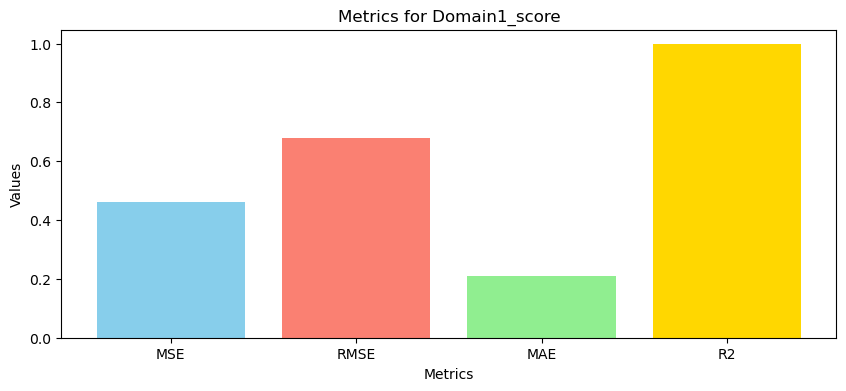

Metrics for Essay_set:
Mean Squared Error (MSE): 0.0001437607820586544
Root Mean Squared Error (RMSE): 0.011990028442779207
Mean Absolute Error (MAE): 0.0001437607820586544
R-squared (R2): 0.9999786215728639



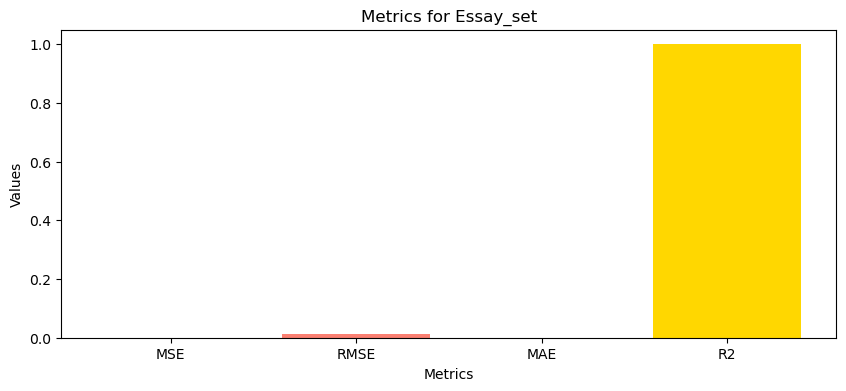


DOMAIN1 SCORE AND ESSAY SET XGBOOST
Metrics for Domain1_score:
Mean Squared Error (MSE): 0.6174525589419206
Root Mean Squared Error (RMSE): 0.7857814956728878
Mean Absolute Error (MAE): 0.3276308223116734
R-squared (R2): 0.9961723345202554



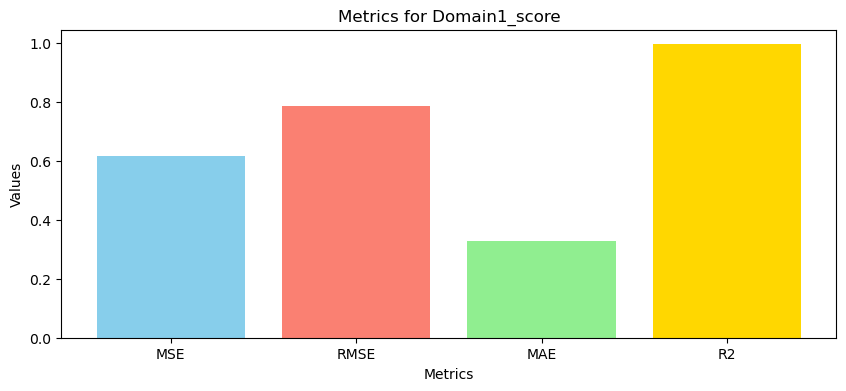

Metrics for Essay_set:
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared (R2): 1.0



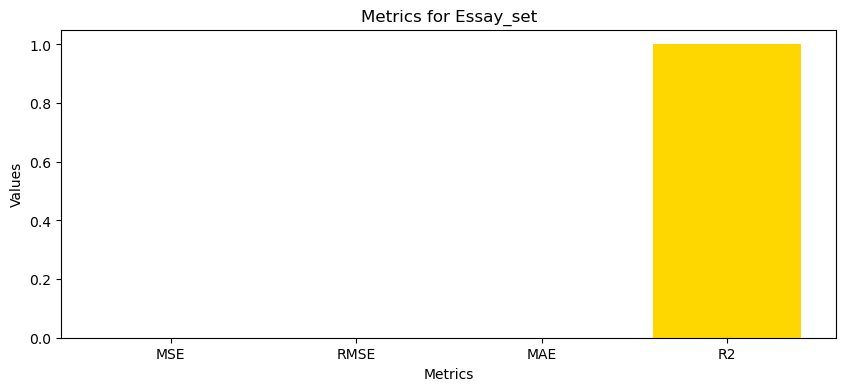

In [122]:
column_names = ['Domain1_score', 'Essay_set']
print("DOMAIN1 SCORE AND ESSAY SET RF")
y_round_pred_rf = round_to_nearest_integer(rf_predictions_domain1_score_essay_set)
evaluate_regression_model(y_test, y_round_pred_rf, column_names)
print()
print("DOMAIN1 SCORE AND ESSAY SET XGBOOST")
y_round_pred_xgb = round_to_nearest_integer(xgb_predictions_domain1_score_essay_set)
evaluate_regression_model(y_test, y_round_pred_xgb, column_names)

DOMAIN2 SCORE RF
Metrics for Domain2_score:
Mean Squared Error (MSE): 0.1676470588235294
Root Mean Squared Error (RMSE): 0.40944726012458477
Mean Absolute Error (MAE): 0.16470588235294117
R-squared (R2): 0.8697571892284223



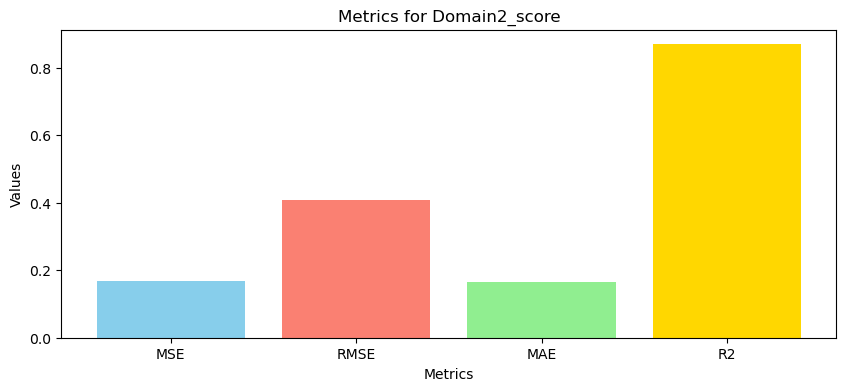


DOMAIN2 SCORE XGBOOST
Metrics for Domain2_score:
Mean Squared Error (MSE): 0.18235294117647058
Root Mean Squared Error (RMSE): 0.4270280332442714
Mean Absolute Error (MAE): 0.17058823529411765
R-squared (R2): 0.8583323812660031



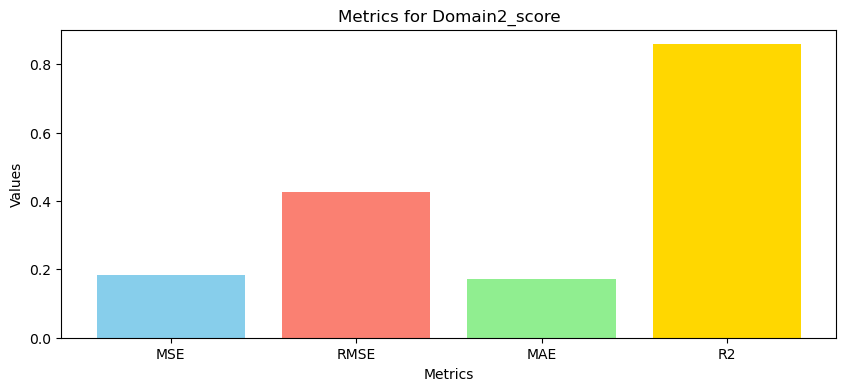

In [123]:
column_names = ['Domain2_score']
print("DOMAIN2 SCORE RF")
y2_round_pred_rf = round_to_nearest_integer(rf_predictions_domain2_score)
evaluate_regression_model(y2_test, y2_round_pred_rf, column_names)
print()
print("DOMAIN2 SCORE XGBOOST")
y2_round_pred_xgb = round_to_nearest_integer(xgb_predictions_domain2_score)
evaluate_regression_model(y2_test, y2_round_pred_xgb, column_names)

The provided results show how well two different types of models, Random Forest (RF) and XGBoost, perform at predicting various aspects of essay scores. they confirm as well what was mentioned in the provided publications and articles. For predicting the scores given to essays (Domain1 and Domain2), the Random Forest model generally performs better than the XGBoost model. This is shown by lower error values (MSE, RMSE, MAE), which indicate how far off the predictions are from the actual scores. Additionally, both models do a great job at explaining the variability in the data, as indicated by high R-squared (R2) values, with the Random Forest model slightly edging out the XGBoost model in this regard. Interestingly, when it comes to predicting the essay set (the topic or theme of the essay), both models excel with near-perfect accuracy. This means that they are highly successful at correctly identifying which set an essay belongs to. However, these great results can also be an indidcator that our model is presenting an overfitting behavior when it comes to predicting essay_set category.

After these results, it would be nice to follow the lead and check the results we could've obtained in the case of dealing with our intial data without trying to balance it.

## Without oversampling

Data for domain1_score and essay_set predictions

In [124]:
print('Getting back our raw data for training input set')
print(x_copy.shape)
x_copy_no_ov = x_copy.copy()
x_copy_no_ov = x_copy_no_ov.drop_duplicates(subset='essay_id')
print(x_copy_no_ov.shape)

Getting back our raw data for training input set
(34778, 49)
(12977, 49)


In [125]:
print('Getting back our raw data for training domain1_score and essay_set prediction')
y_resampled_no_ov = df_new.loc[:,['domain1_score', 'essay_set']]
print(y_resampled_no_ov.shape)
print(y_resampled_no_ov)

Getting back our raw data for training domain1_score and essay_set prediction
(12977, 2)
       domain1_score  essay_set
0                8.0          1
1                9.0          1
2                7.0          1
3               10.0          1
4                8.0          1
...              ...        ...
12973           35.0          8
12974           32.0          8
12975           40.0          8
12976           40.0          8
12977           40.0          8

[12977 rows x 2 columns]


For domain2_score

In [126]:
# We are filtering to keep only essay_sets ==2
x2_copy = df.loc[df['essay_set']==2,['essay_id']]
x2_copy.columns

Index(['essay_id'], dtype='object')

In [127]:
print(x2_copy.shape)

(1800, 1)


In [128]:
x2_features = X2.copy()
x2_no_ov = x2_features.drop_duplicates()
print(x2_no_ov.shape)

(1800, 74)


In [133]:
x2_no_ov.columns

Index(['essay_id', 'nlp_spacy', 'essay_set_x', 'rater1_domain1',
       'rater2_domain1', 'rater3_domain1', 'rater1_domain2', 'rater2_domain2',
       'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4',
       'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2',
       'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
       'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4',
       'rater3_trait5', 'rater3_trait6', 'essay_length', 'tags_percentage',
       'sent/leng ratio', 'sentence_length_variation',
       'transition_words_counts', 'cttr', 'num_sentences', 'avg_sen_leng',
       'flesch_reading_ease', 'gunning_fog_index', 'misspelled_percentage',
       'adjectives (%)', 'adverbs (%)', 'nouns (%)', 'verbs (%)',
       'long_word_token_ratio', 'short_word_token_ratio', 'lemma_token_ratio',
       'token_sentence_ratio', 'non_initial_caps_word_ratio',
       'char_sentence_ratio', 'fourth_root_word_tokens',
       'wo

In [134]:
x2_no_ov= x2_no_ov.drop(columns=['nlp_spacy','rater1_domain1',
       'rater2_domain1', 'rater3_domain1', 'rater1_domain2', 'rater2_domain2',
       'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4',
       'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2',
       'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
       'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4',
       'rater3_trait5', 'rater3_trait6'])

Index(['essay_id', 'essay_set_x', 'essay_length', 'tags_percentage',
       'sent/leng ratio', 'sentence_length_variation',
       'transition_words_counts', 'cttr', 'num_sentences', 'avg_sen_leng',
       'flesch_reading_ease', 'gunning_fog_index', 'misspelled_percentage',
       'adjectives (%)', 'adverbs (%)', 'nouns (%)', 'verbs (%)',
       'long_word_token_ratio', 'short_word_token_ratio', 'lemma_token_ratio',
       'token_sentence_ratio', 'non_initial_caps_word_ratio',
       'char_sentence_ratio', 'fourth_root_word_tokens',
       'word_variation_index', 'nominal_ratio', 'conjunction_ratio',
       'subjunction_ratio', 'genitive_form_ratio', 'minor_delimiter_ratio',
       'major_delimiter_ratio', 'particle_ratio', 'relative_adverb_ratio',
       'determiner_ratio', 'interrogative_relative_determiner_ratio',
       'participle_ratio', 'paired_delimiter_ratio', 'passive_voice_ratio',
       'active_voice_ratio', 'possessive_form_ratio', 'preposition_ratio',
       'adjective_ra

In [140]:
x2_no_ov.columns

Index(['essay_id', 'essay_set_x', 'essay_length', 'tags_percentage',
       'sent/leng ratio', 'sentence_length_variation',
       'transition_words_counts', 'cttr', 'num_sentences', 'avg_sen_leng',
       'flesch_reading_ease', 'gunning_fog_index', 'misspelled_percentage',
       'adjectives (%)', 'adverbs (%)', 'nouns (%)', 'verbs (%)',
       'long_word_token_ratio', 'short_word_token_ratio', 'lemma_token_ratio',
       'token_sentence_ratio', 'non_initial_caps_word_ratio',
       'char_sentence_ratio', 'fourth_root_word_tokens',
       'word_variation_index', 'nominal_ratio', 'conjunction_ratio',
       'subjunction_ratio', 'genitive_form_ratio', 'minor_delimiter_ratio',
       'major_delimiter_ratio', 'particle_ratio', 'relative_adverb_ratio',
       'determiner_ratio', 'interrogative_relative_determiner_ratio',
       'participle_ratio', 'paired_delimiter_ratio', 'passive_voice_ratio',
       'active_voice_ratio', 'possessive_form_ratio', 'preposition_ratio',
       'adjective_ra

In [141]:
x2_no_ov = x2_no_ov.drop(columns=['essay_set_x'])

In [142]:
print('Getting back our raw data for domain2_score prediction')
y2_resampled_no_ov = df_new.loc[df_new['essay_set']==2,['domain2_score']]
print(y2_resampled_no_ov.shape)

Getting back our raw data for domain2_score prediction
(1800, 1)


In [143]:
# Training and testing sets split for domain1_score and essay_set
x_no_ov_train, x_no_ov_test, y_no_ov_train, y_no_ov_test= train_test_split(x_copy_no_ov, y_resampled_no_ov, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shapes of training sets  Without OVERSAMPLING:")
print("x_train:", x_no_ov_train.shape)
print("y_train:", y_no_ov_train.shape)
print("\nShapes of testing sets Without OVERSAMPLING:")
print("x_test:", x_no_ov_test.shape)
print("y_test:", y_no_ov_test.shape)


Shapes of training sets  Without OVERSAMPLING:
x_train: (10381, 49)
y_train: (10381, 2)

Shapes of testing sets Without OVERSAMPLING:
x_test: (2596, 49)
y_test: (2596, 2)


In [144]:
x2_no_ov_train, x2_no_ov_test, y2_no_ov_train, y2_no_ov_test= train_test_split(x2_no_ov, y2_resampled_no_ov , test_size=0.2, random_state=42)
# Print the shapes of the resulting datasets
print("Shapes of training sets  Without OVERSAMPLING:")
print("x_train:", x2_no_ov_train.shape)
print("y_train:", y2_no_ov_train.shape)
print("\nShapes of testing sets Without OVERSAMPLING:")
print("x_test:", x2_no_ov_test.shape)
print("y_test:", y2_no_ov_test.shape)

Shapes of training sets  Without OVERSAMPLING:
x_train: (1440, 49)
y_train: (1440, 1)

Shapes of testing sets Without OVERSAMPLING:
x_test: (360, 49)
y_test: (360, 1)


In [149]:
# x2_no_ov_test.columns

In [145]:
# For domain1_score and essay_set prediction without oversampling
rf_no_ov_pred_d1_score_essay_set , xgb_no_ov_pred_d1_score_esssay_set  = train_predict_models(x_no_ov_train,  y_no_ov_train, x_no_ov_test)
# , y_no_ov_test)

C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

In [146]:
# For domain2_score prediction without oversampling
rf_no_ov_pred_domain2_score , xgb_no_ov_pred_domain2_score  = train_predict_models(x2_no_ov_train,y2_no_ov_train, x2_no_ov_test)
# , y2_no_ov_test)

C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\SALEH\.conda\envs\py_camp\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_c

DOMAIN1 SCORE AND ESSAY SET RF
Metrics for Domain1_score:
Mean Squared Error (MSE): 2.430277349768875
Root Mean Squared Error (RMSE): 1.5589346842536012
Mean Absolute Error (MAE): 0.8100924499229584
R-squared (R2): 0.9708000957685938



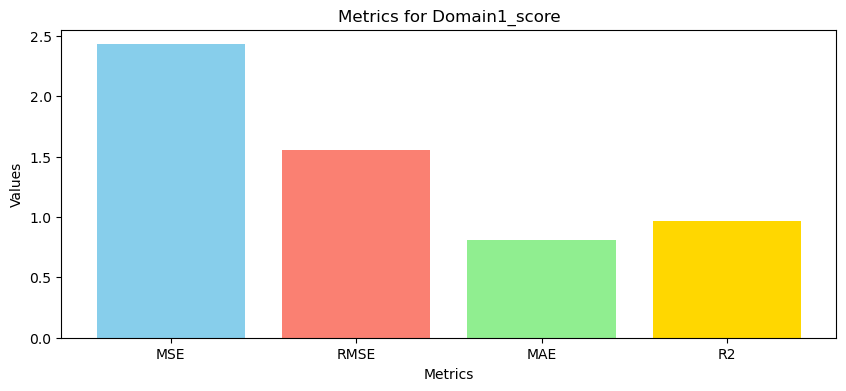

Metrics for Essay_set:
Mean Squared Error (MSE): 0.0003852080123266564
Root Mean Squared Error (RMSE): 0.01962671679947149
Mean Absolute Error (MAE): 0.0003852080123266564
R-squared (R2): 0.999917248340281



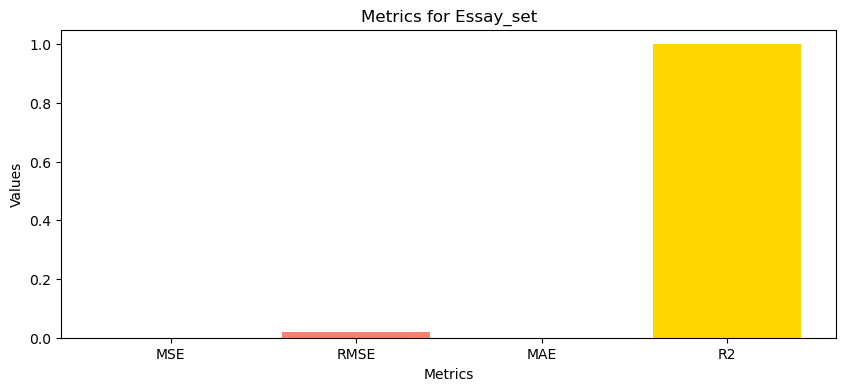


DOMAIN1 SCORE AND ESSAY SET XGBOOST
Metrics for Domain1_score:
Mean Squared Error (MSE): 2.62557781201849
Root Mean Squared Error (RMSE): 1.6203634814505326
Mean Absolute Error (MAE): 0.8528505392912172
R-squared (R2): 0.9684535509207062



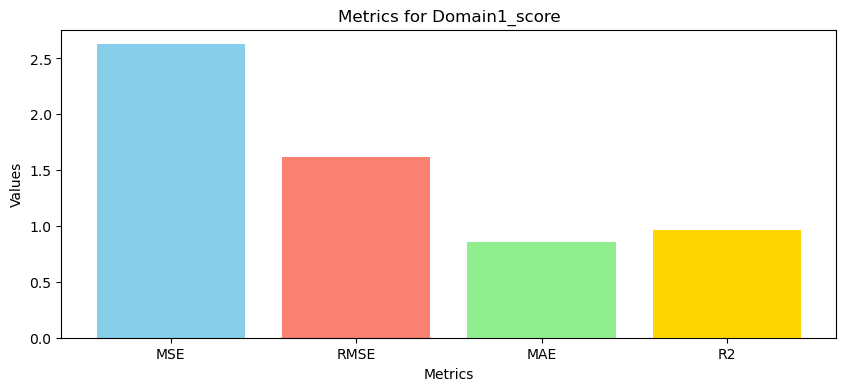

Metrics for Essay_set:
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared (R2): 1.0



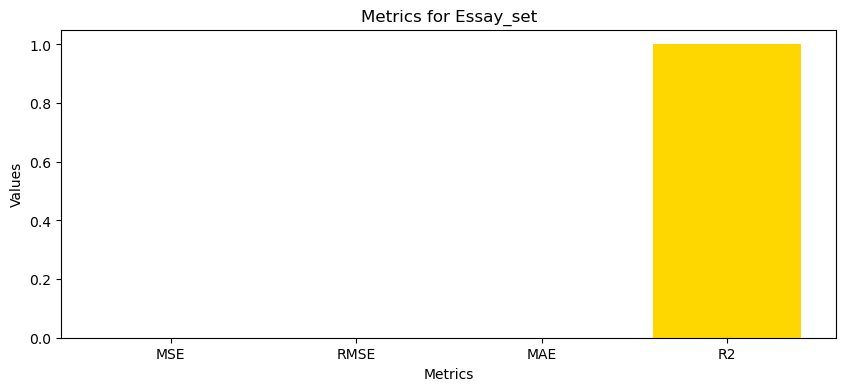

In [147]:
column_names = ['Domain1_score', 'Essay_set']
print("DOMAIN1 SCORE AND ESSAY SET RF")
y1_round_pred_rf = round_to_nearest_integer(rf_no_ov_pred_d1_score_essay_set)
evaluate_regression_model(y_no_ov_test, y1_round_pred_rf, column_names)
print()
print("DOMAIN1 SCORE AND ESSAY SET XGBOOST")
y1_round_pred_xgb = round_to_nearest_integer(xgb_no_ov_pred_d1_score_esssay_set)
evaluate_regression_model(y_no_ov_test, y1_round_pred_xgb, column_names)

DOMAIN2 SCORE RF
Metrics for Domain2_score:
Mean Squared Error (MSE): 0.3111111111111111
Root Mean Squared Error (RMSE): 0.5577733510227171
Mean Absolute Error (MAE): 0.3111111111111111
R-squared (R2): 0.3473087818696883



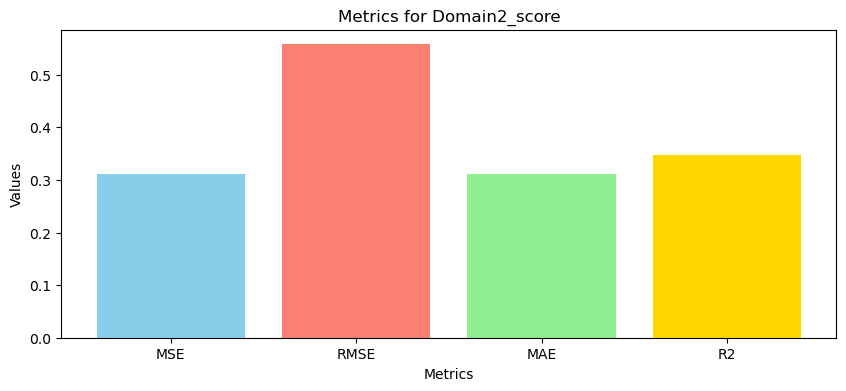


DOMAIN2 SCORE XGBOOST
Metrics for Domain2_score:
Mean Squared Error (MSE): 0.3861111111111111
Root Mean Squared Error (RMSE): 0.6213783960769083
Mean Absolute Error (MAE): 0.38055555555555554
R-squared (R2): 0.18996357749898818



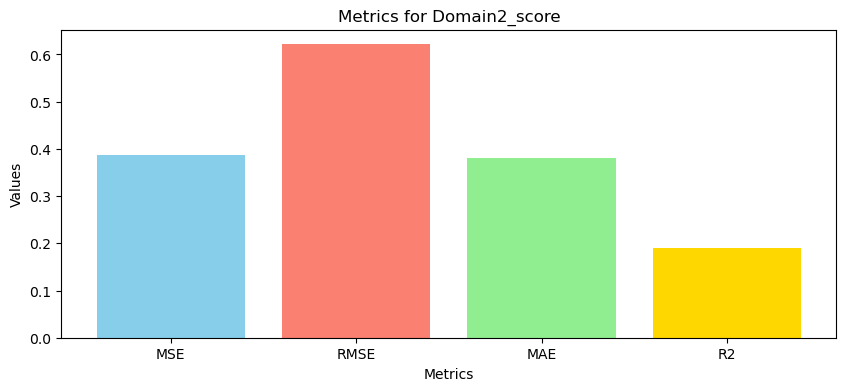

In [148]:
column_names = ['Domain2_score']
print("DOMAIN2 SCORE RF")
y2_no_ov_round_pred_rf = round_to_nearest_integer(rf_no_ov_pred_domain2_score)
evaluate_regression_model(y2_no_ov_test, y2_no_ov_round_pred_rf, column_names)
print()
print("DOMAIN2 SCORE XGBOOST")
y2_no_ov_round_pred_xgb = round_to_nearest_integer(xgb_no_ov_pred_domain2_score)
evaluate_regression_model(y2_no_ov_test, y2_no_ov_round_pred_xgb, column_names)

The analysis shows that the RF model performs quite well in predicting domain1_score and essay_set. For domain1_score, it has moderate errors, with an average error of about 2.43 and a difference of 1.56. The average absolute error is around 0.81, indicating some level of accuracy. However, when predicting essay_set, RF excels, showing very low errors, with an average error of only 0.00039 and a difference of about 0.02. The absolute error is also very small, around 0.00039. Furthermore, it achieves a near-perfect R² value close to 1.0. Conversely, the XGBoost model shows slightly higher errors in predicting domain1_score, with an average error of 2.74 and a difference of approximately 1.66. The absolute error is about 0.87, which is an acceptable accuracy. However, XGBoost performs exceptionally well in predicting essay_set, with no errors and a perfect R² value of 1.0. This illustrates its higher accuracy in this prediction compared to RF.

<font color='yellow'><h3>| Conclusion:</h3></font> Comparing the results of models trained with and without oversampling, it's clear that oversampling generally leads to better performance across different evaluation metrics. For example, in the case of domain1_score and essay_set predictions using RF, oversampling significantly reduces the MSE and MAE while increasing the R² value, which indicates a better model fit. Similar behavior is observed in the XGBoost model's performance metrics. In fact, in the oversampled scenario, the MSE for essay_set predictions using XGBoost is reduced to zero, indicating perfect predictions. However, oversampling doesn't always guarantee better results; for example, in the case of domain2_scores, the RF model shows a higher MSE and RMSE with oversampling compared to the non-oversampled model, which means that the oversampled data might have introduced noise or overfitting in our case. Therefore, to address our challenge, we can predict our domain1_score essays and predict the set they belong to using the first model after oversampling the data and after addressing the imbalanced data issue. Furthermore, whenever domain2_score is needed to be predicted, we can use the model trained on raw inital data to get better results.

#### References
1. https://www.scitepress.org/PublishedPapers/2021/103775/103775.pdf

2. https://www.researchgate.net/publication/360456237_A_Survey_on_Automatic_Essay_Evaluation_System_using_Machine_Learning

3. https://web.archive.org/web/20220809171145id_/http://www.icicel.org/ell/contents/2022/1/el-16-01-11.pdf

4. https://link.springer.com/article/10.1007/s10462-021-10068-2#Sec2

5. https://www.diva-portal.org/smash/get/diva2:602025/FULLTEXT01.pdf